# 1- Introduction

A very common use of machine learning regression techniques is predicting prices of goods. Especially prices of real estate due to all the telling features that have influence of the price. 

In the following notebook we will make use of the publicaly available housing price data (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

This is data set is particularly good for exploratory data analysis and feature engineering as it has a whopping 79 variables to analyse. Here is a description of the features: 

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

let's ge to it! 

#### Importing the data

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.linear_model as linear_model
from sklearn.ensemble import GradientBoostingRegressor


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [2]:
train = pd.read_csv('C:/Users/eliec/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/eliec/house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(train.columns)
train.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(test.columns)
test.head()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print ("train shape", train.shape)
print ("test shape", test.shape)

train shape (1460, 81)
test shape (1459, 80)


#### Splitting and organizing the data

Due to the high number of variables and generally a good practice, we will split our variables into 3 main categories. Qualitative/Discrete, Quantitative/Continuous and Datetime. This will help us in the analysis as those 3 categories tend to be analized using different approaches.

In [6]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

In [7]:
print("quantitative: ", len(quantitative))
print("qualitative: ", len(qualitative))

quantitative:  36
qualitative:  43


eventhough some features are expressed in numbers, it does not mean that they are continous. We will look at the length of the unique values for each quantitative feature to get a hint of whether to treat it as dicrete or continous.

In [8]:
for f in quantitative:
    print(f, "has", len(train[f].unique()), "values")

MSSubClass has 15 values
LotFrontage has 111 values
LotArea has 1073 values
OverallQual has 10 values
OverallCond has 9 values
YearBuilt has 112 values
YearRemodAdd has 61 values
MasVnrArea has 328 values
BsmtFinSF1 has 637 values
BsmtFinSF2 has 144 values
BsmtUnfSF has 780 values
TotalBsmtSF has 721 values
1stFlrSF has 753 values
2ndFlrSF has 417 values
LowQualFinSF has 24 values
GrLivArea has 861 values
BsmtFullBath has 4 values
BsmtHalfBath has 3 values
FullBath has 4 values
HalfBath has 3 values
BedroomAbvGr has 8 values
KitchenAbvGr has 4 values
TotRmsAbvGrd has 12 values
Fireplaces has 4 values
GarageYrBlt has 98 values
GarageCars has 5 values
GarageArea has 441 values
WoodDeckSF has 274 values
OpenPorchSF has 202 values
EnclosedPorch has 120 values
3SsnPorch has 20 values
ScreenPorch has 76 values
PoolArea has 8 values
MiscVal has 21 values
MoSold has 12 values
YrSold has 5 values


In [9]:
discrete = ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch','MiscVal', 'MoSold', 'YrSold']
print("discrete", len(discrete))
date = ['YearBuilt','YearRemodAdd', 'GarageYrBlt']
print("date", len(date))

discrete 17
date 3


In [10]:
qualitative = qualitative+discrete
print("qualtitative", len(qualitative))

qualtitative 60


In [11]:
quali_date = qualitative+date

In [12]:
quantitative = train.columns.to_list()

for f in quali_date:
    quantitative.remove(f)

quantitative.remove("Id")
quantitative.remove("SalePrice")

print("quantitative", len(quantitative))
quantitative

quantitative 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea']

# 2- Exploratory Data Analysis

## Continuous Features

### Pairplots

It would be useful to see how sale price compares to each continous variable.

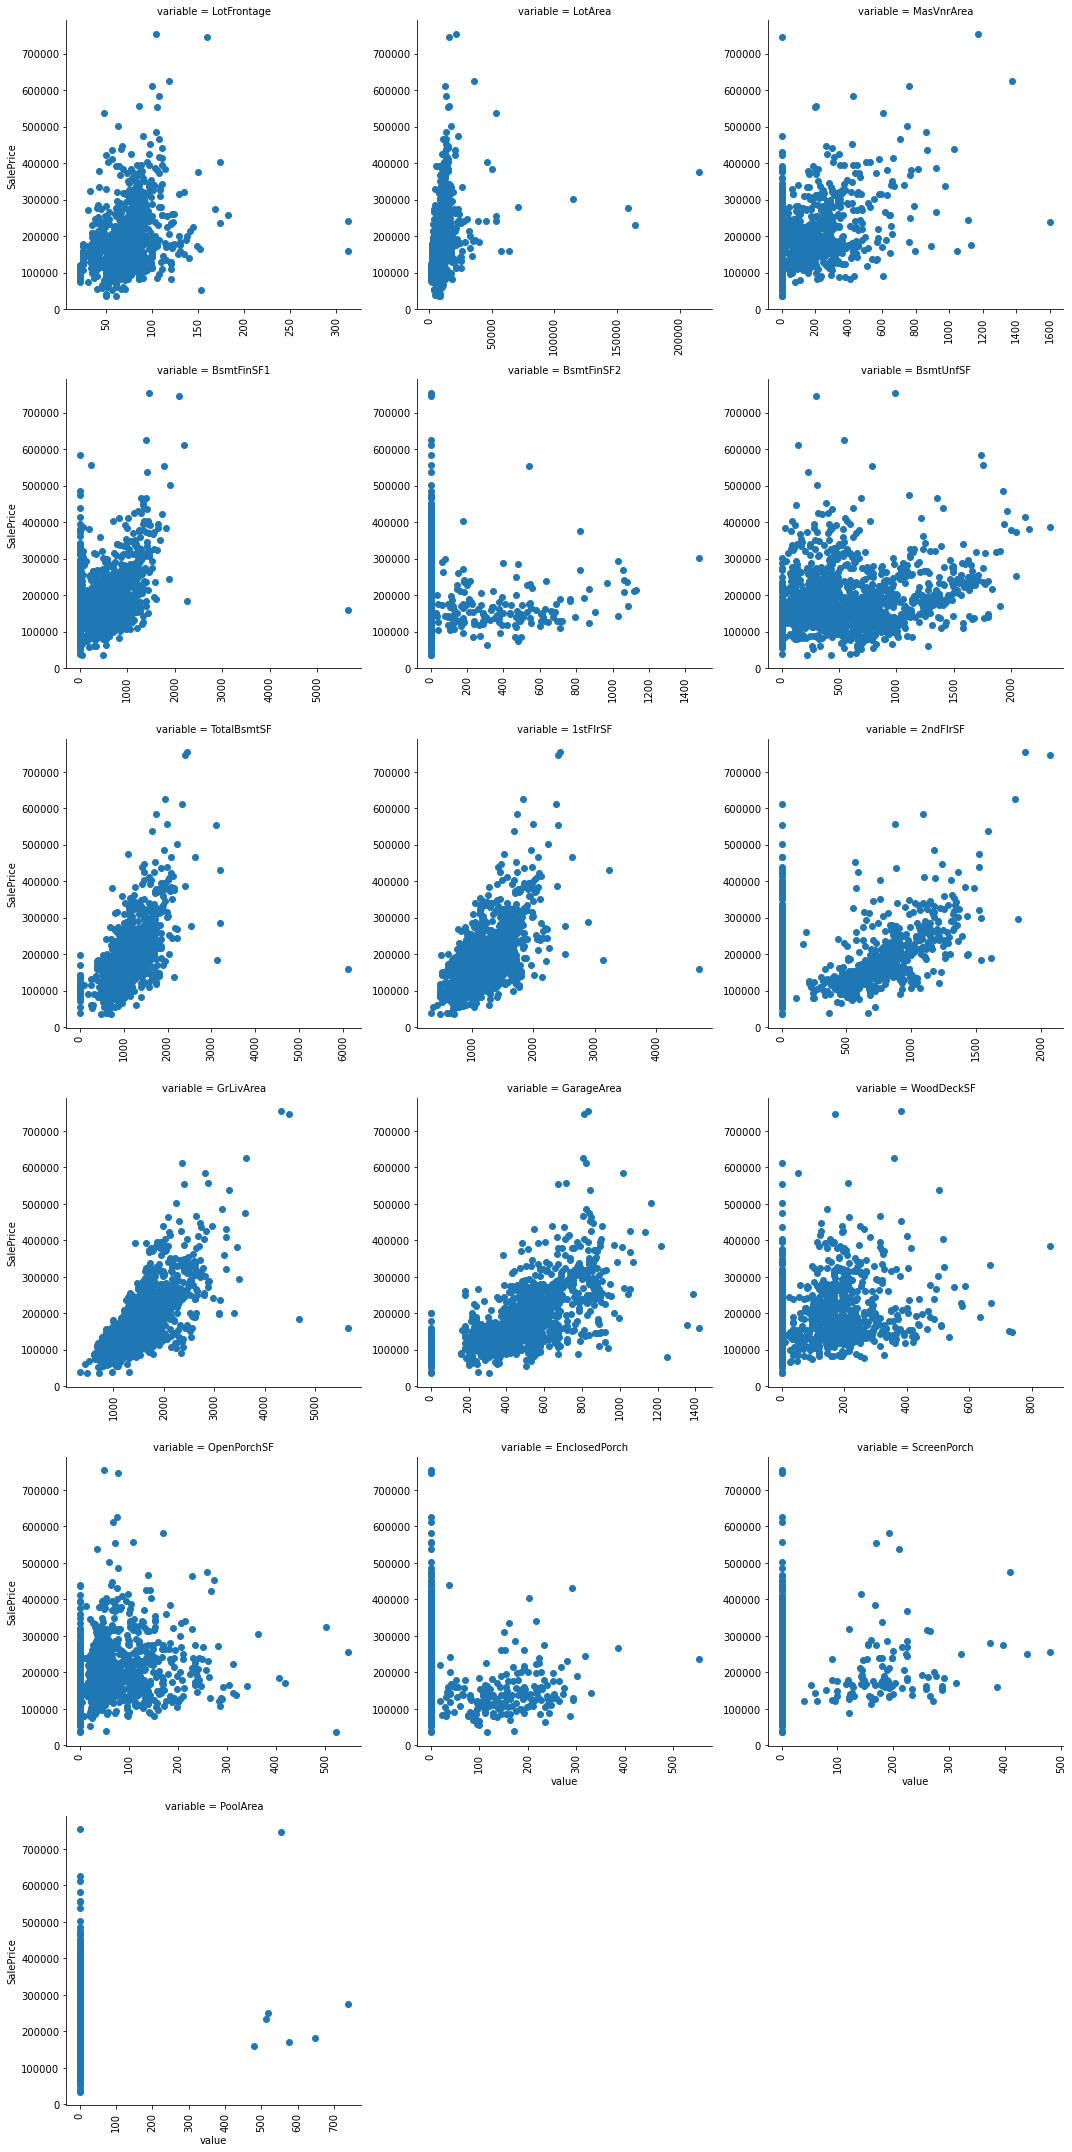

In [13]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ax.scatter(x=x, y=y)
    plt.xticks(rotation=90)

f_quantitative = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative)
g = sns.FacetGrid(f_quantitative, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice")

In [14]:
train[quantitative].corr("pearson")

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.402797,0.344997,0.088521,0.151972,0.010700,0.041383,0.206167
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.084774,-0.018340,0.043160,0.077672
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,0.390857,0.373066,0.159718,0.125703,-0.110204,0.061466,0.011723
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.296970,0.204306,0.111761,-0.102303,0.062021,0.140491
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.018227,0.067898,0.003093,0.036543,0.088871,0.041709
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.183303,-0.005316,0.129005,-0.002538,-0.012579,-0.035092
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.095478,0.084489,0.126053
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,-0.065292,0.088758,0.131525
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.208026,0.061989,0.040606,0.081487
GrLivArea,0.402797,0.263116,0.390857,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.009113,0.101510,0.170205


In [15]:
train[quantitative+["SalePrice"]].corr("pearson")["SalePrice"]

LotFrontage      0.351799
LotArea          0.263843
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
GrLivArea        0.708624
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
SalePrice        1.000000
Name: SalePrice, dtype: float64

Most of the features seem to have a certain correlation with the SalePrice but many have a lot of values equal to zero. This is due to the unit not having this particular feature. we need to deal with that by creating new boolean features for all of those features which have a strong correlation with SalePrice 

- ScreenPorch = 0 does not have an open porch 
- 2ndFlrSF = 0 does not have a 2nd floor
- TotalBsmtSF = 0 does not have a basement 
- PoolArea = 0 does not have a pool

In [16]:
train['Basement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['Porch'] = train['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
train['Pool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [17]:
train.drop(columns=["TotalBsmtSF",'2ndFlrSF', 'ScreenPorch', 'PoolArea'], inplace=True)

We will drop the features that have no impact on sales price and we should be investigating multicollinearity. A lot of the features are correlated so sales price but also to one another which could be problematic for our model. We need to filter our the features that are represented by other more important features and carry no additional information.

In [18]:
train.drop(columns=["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageArea", "WoodDeckSF",
                    "OpenPorchSF", "EnclosedPorch"], inplace=True)

## Discrete Features

For simplicity we will replace all missing values in the discrete features with "missing" then we will plot a boxplot for each feature detailing the districution of that feature and the number of observations for each category. This will alow us to assess the impact of each feature on our target variable SalePrice so that we can decide whether the keep, drop or convert the feature.

In [19]:
for c in qualitative:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['missing'])
        train[c] = train[c].fillna('missing')

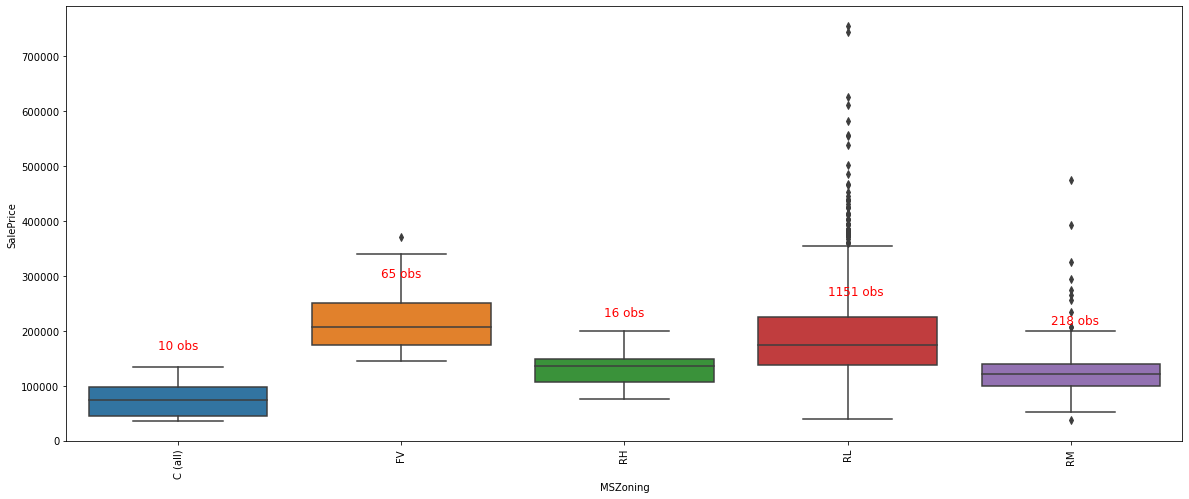

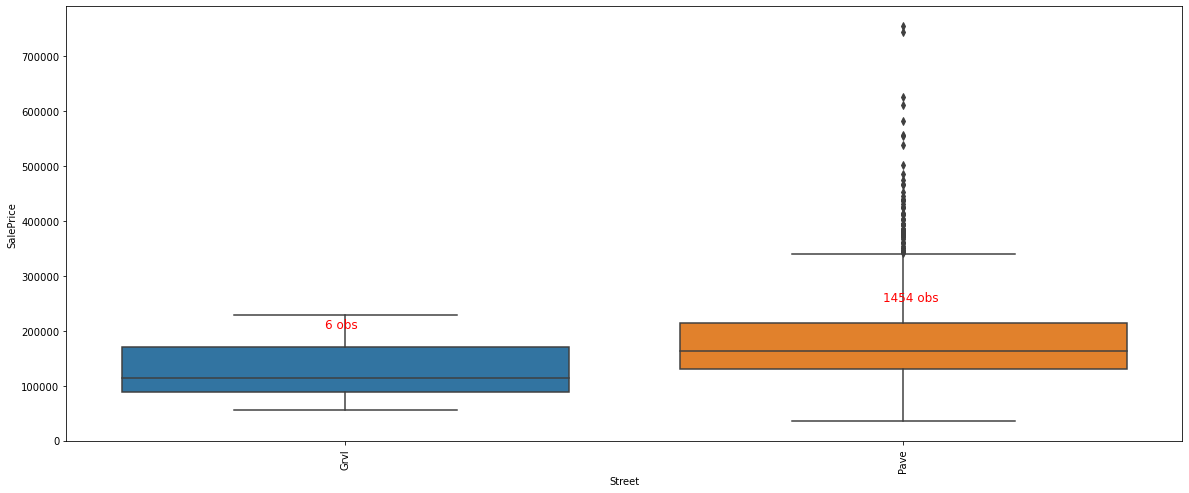

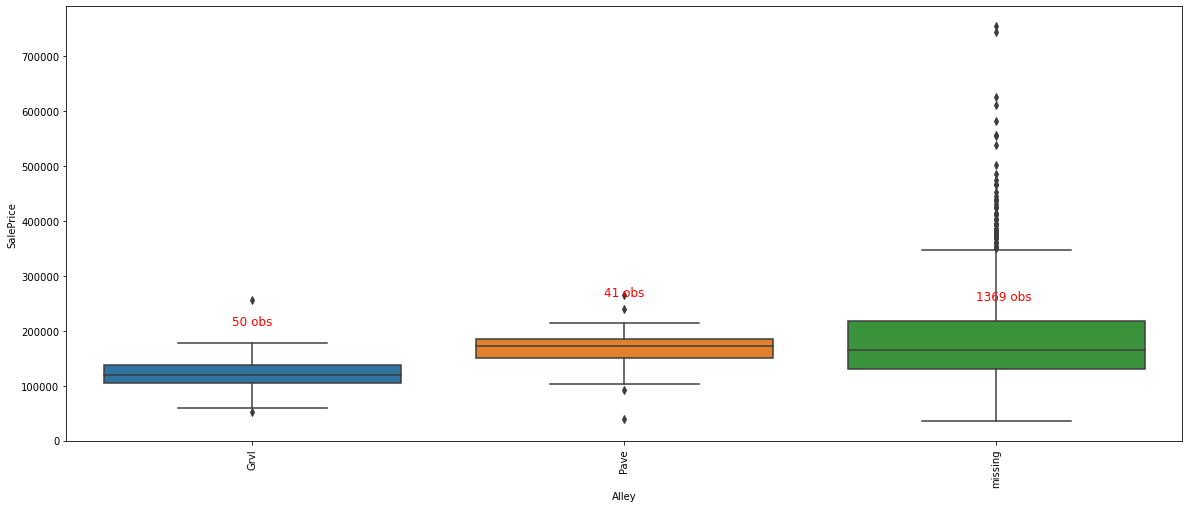

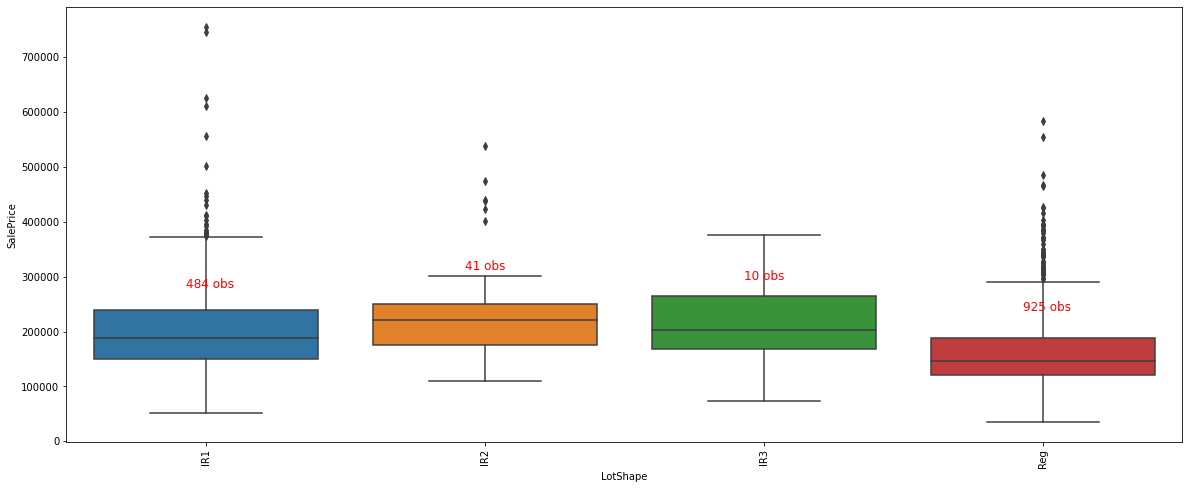

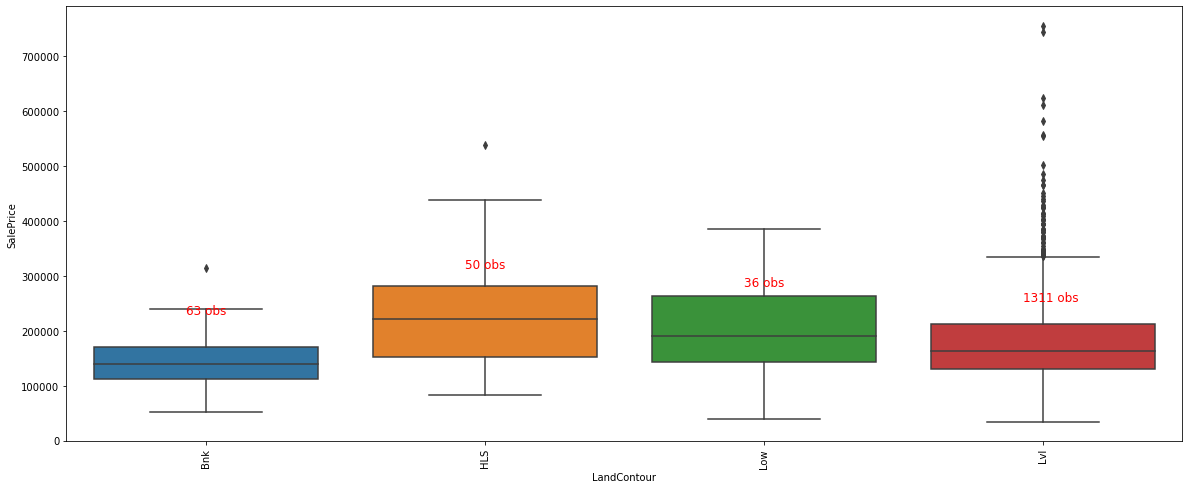

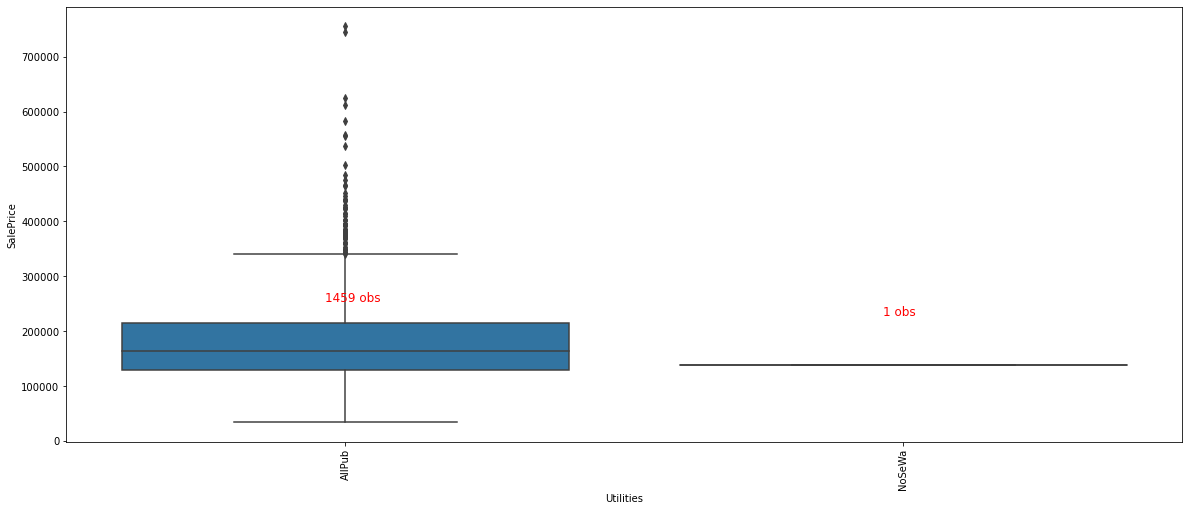

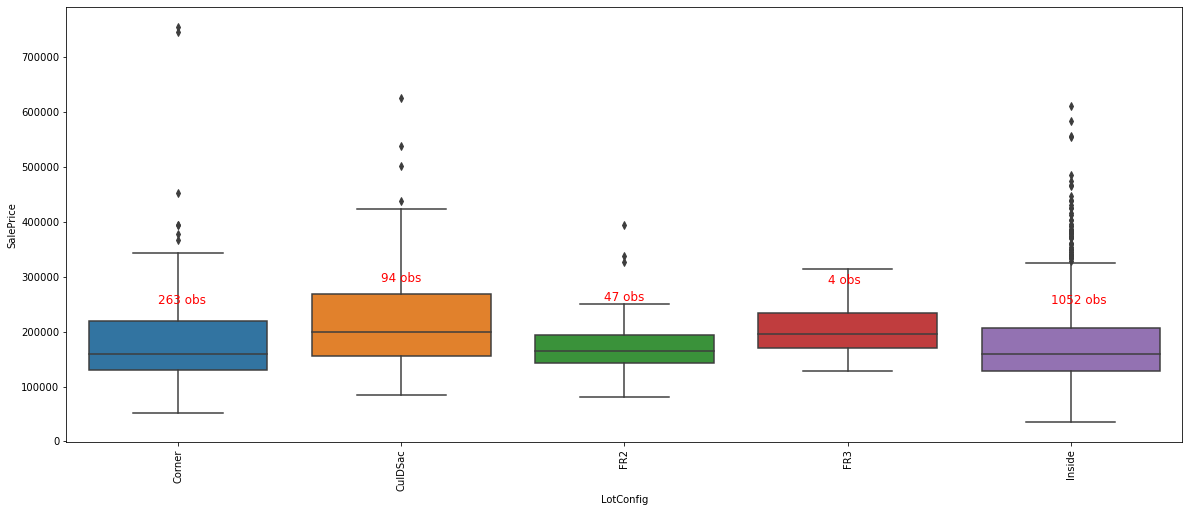

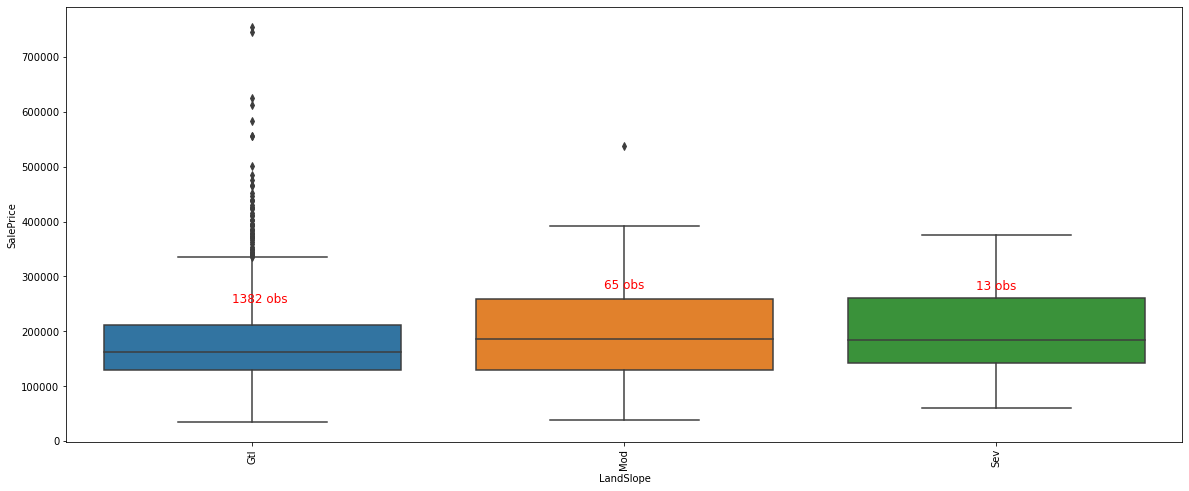

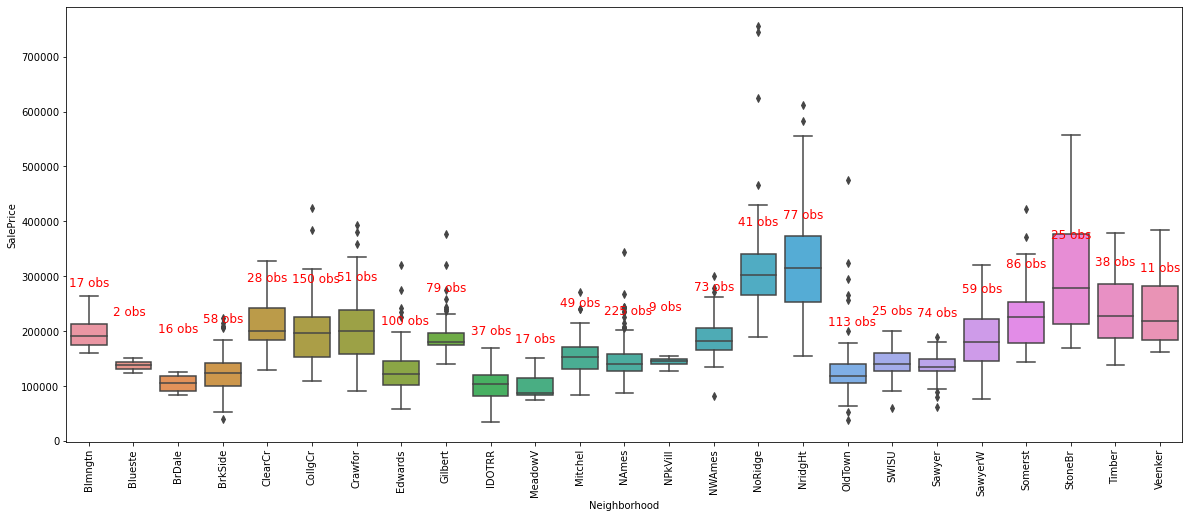

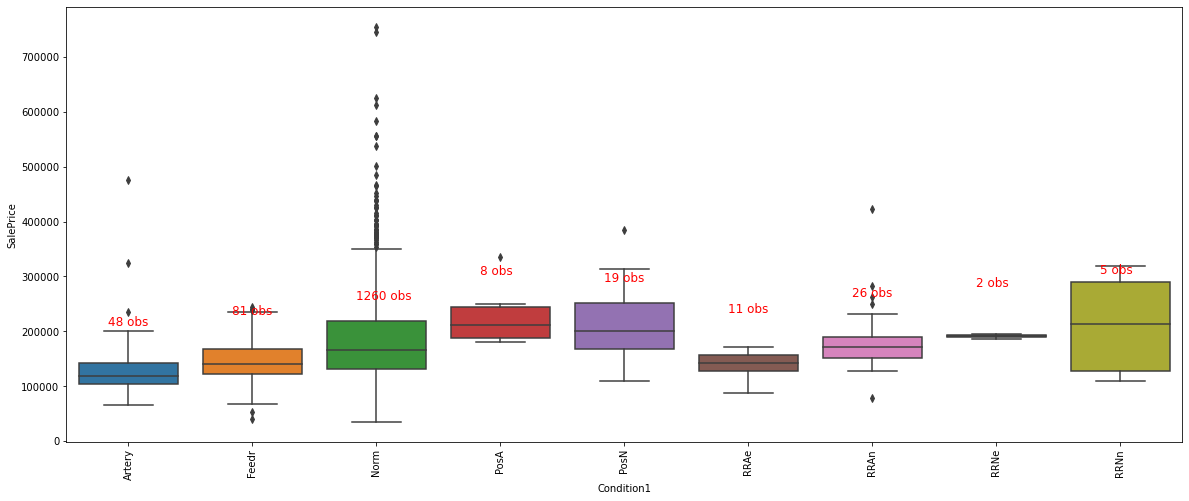

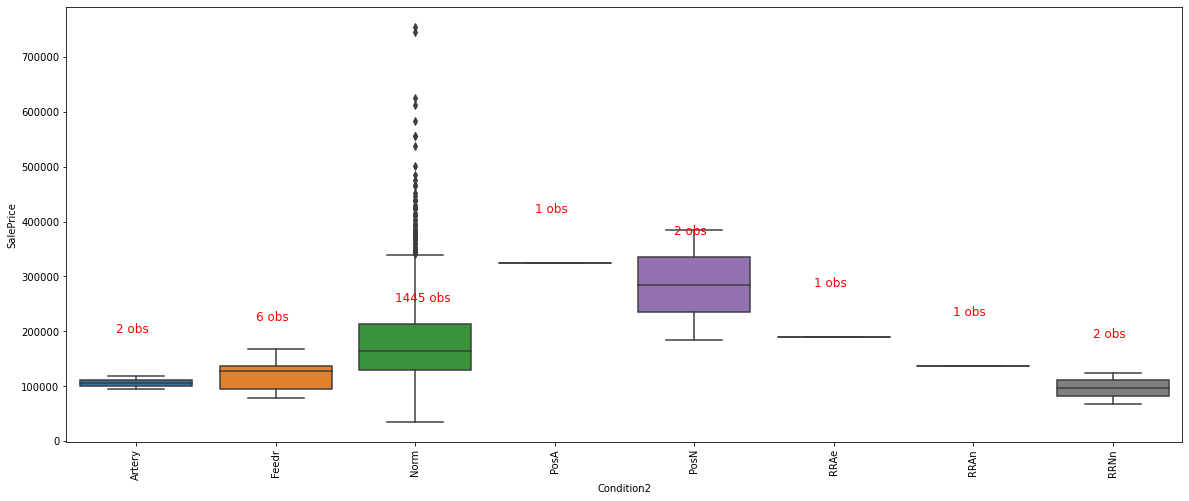

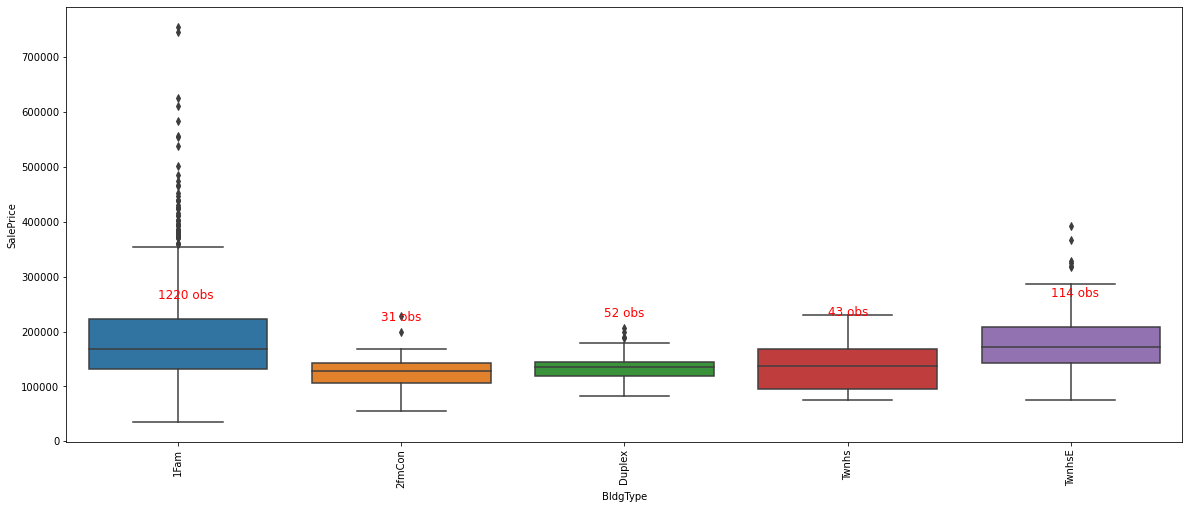

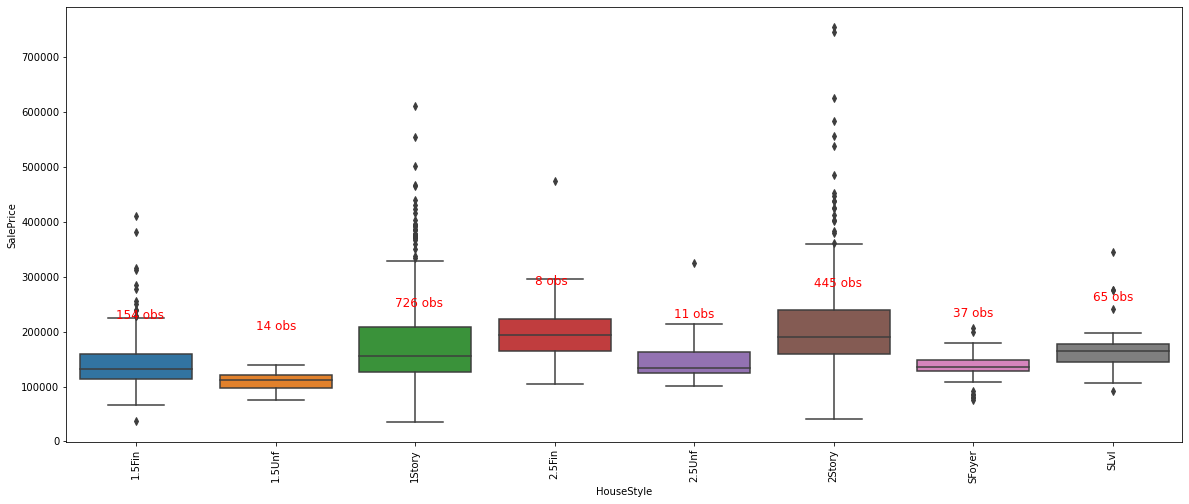

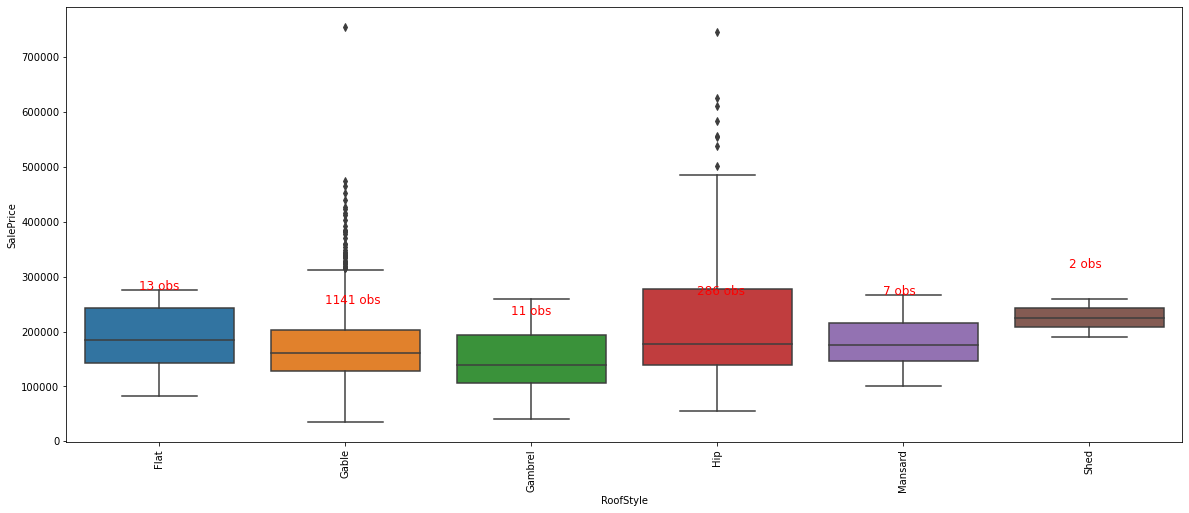

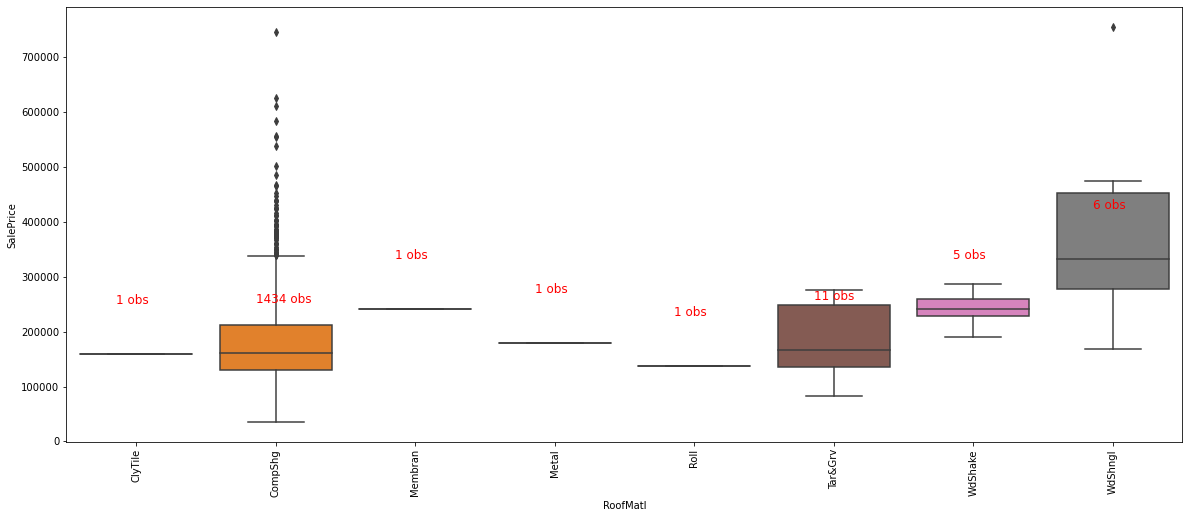

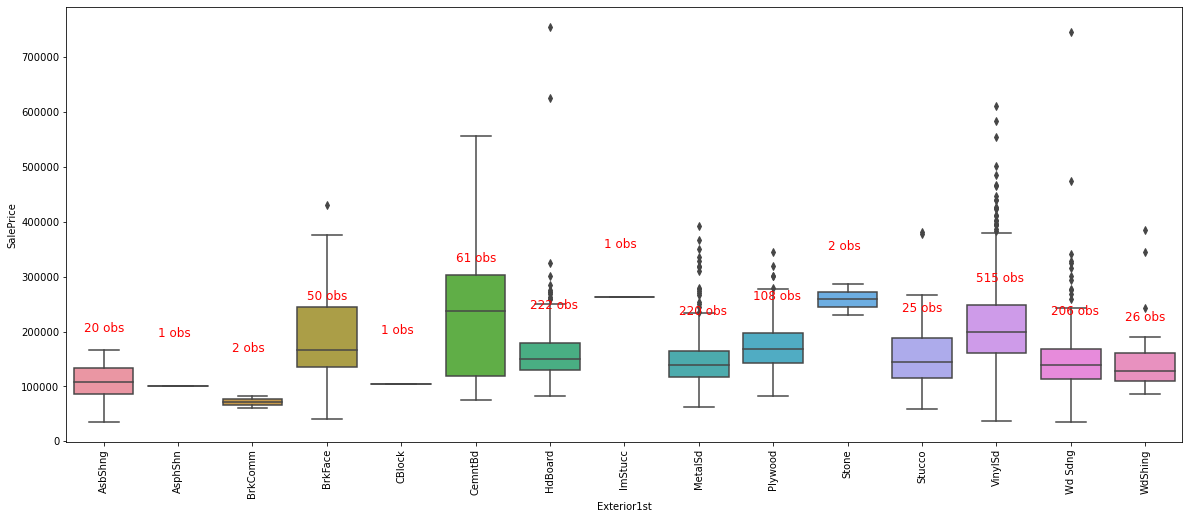

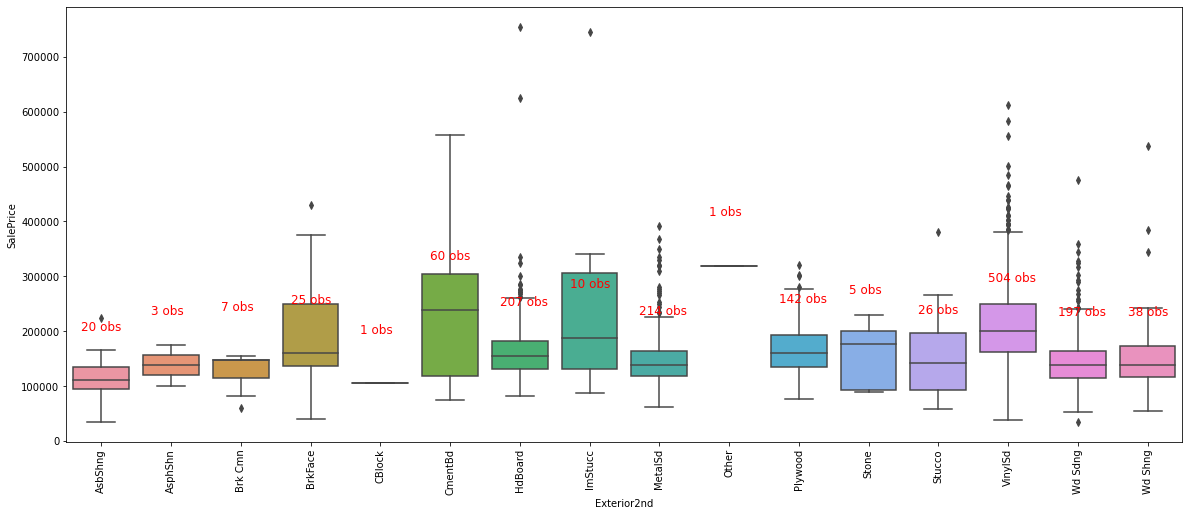

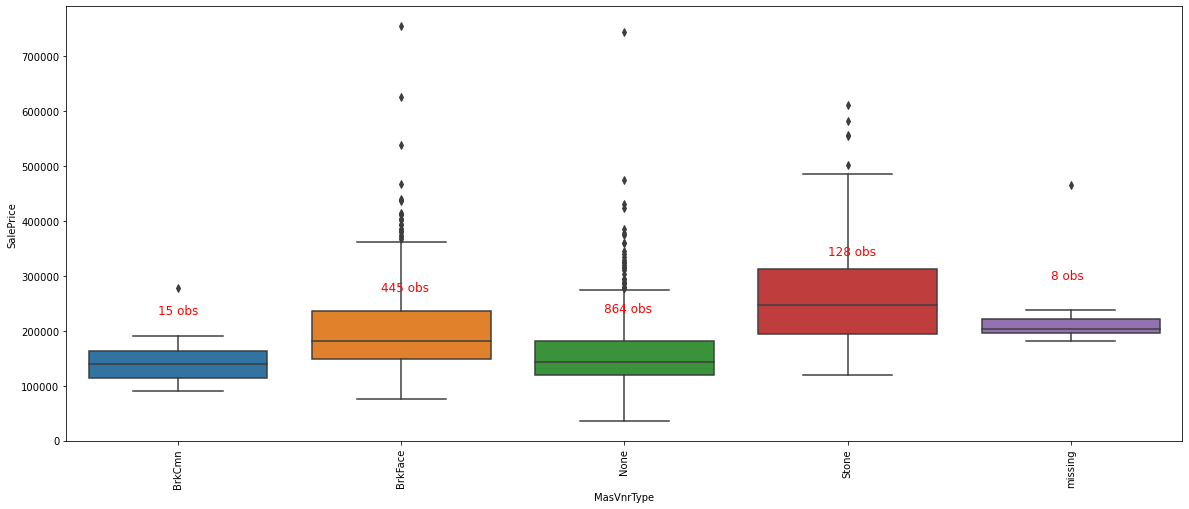

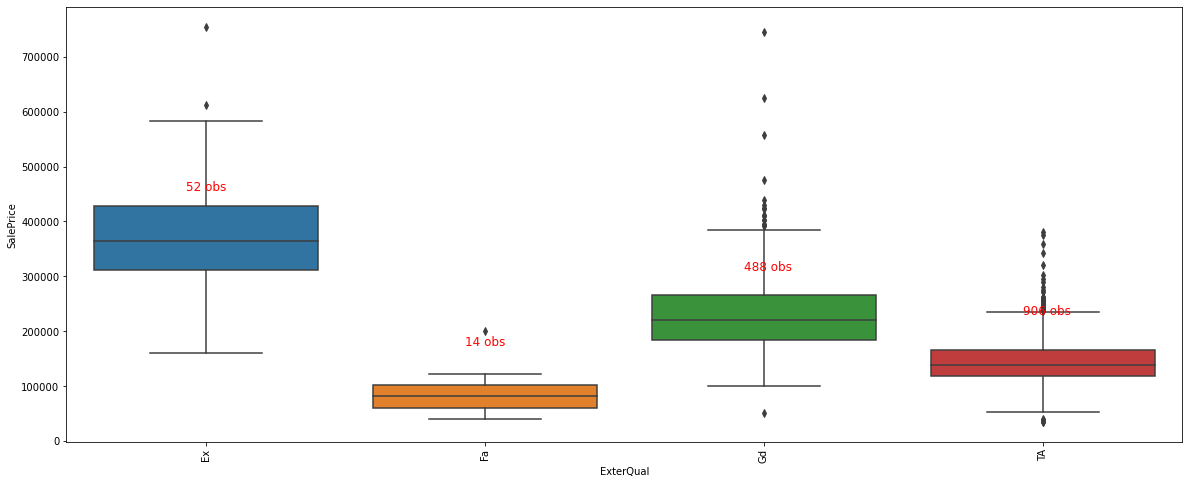

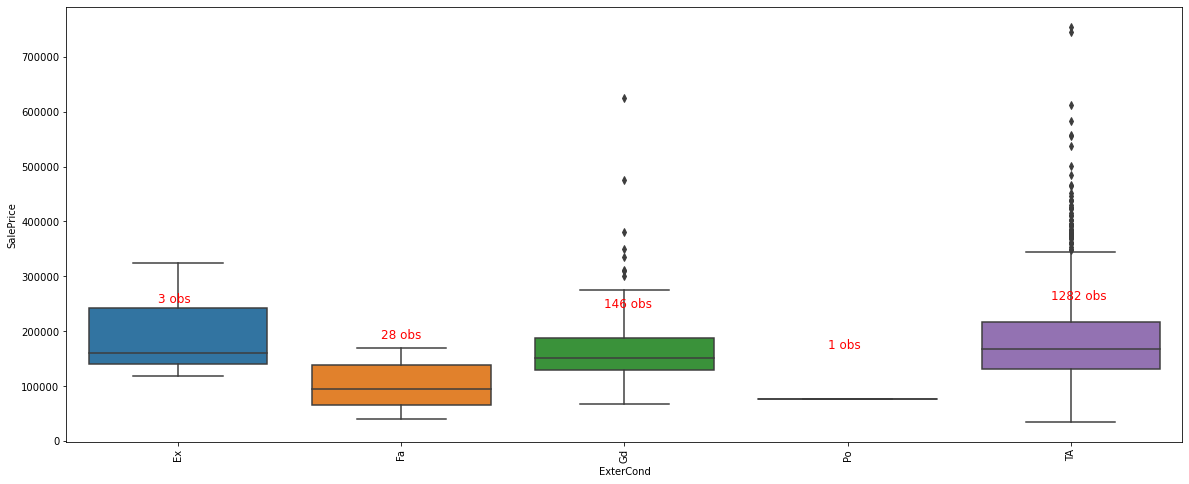

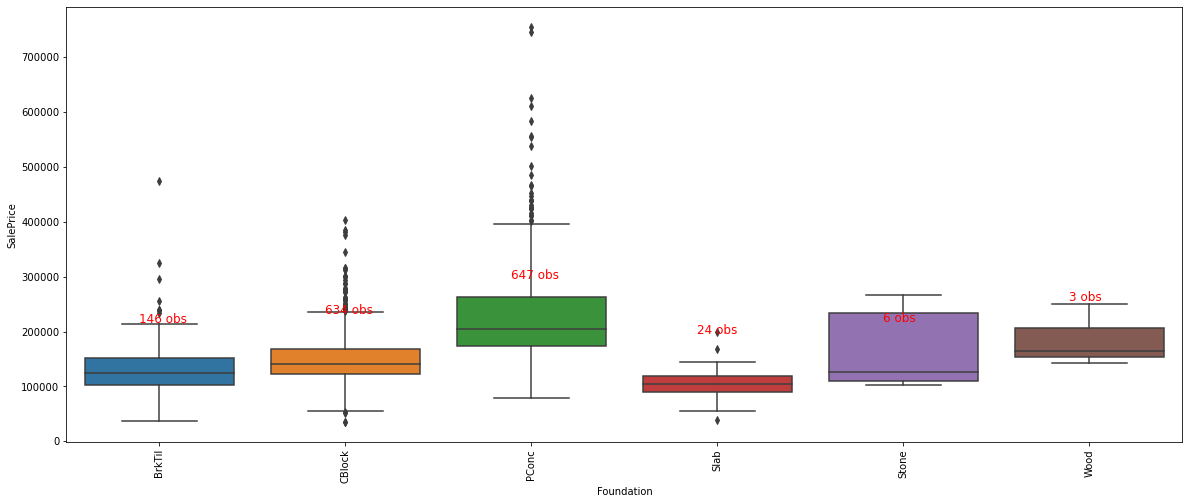

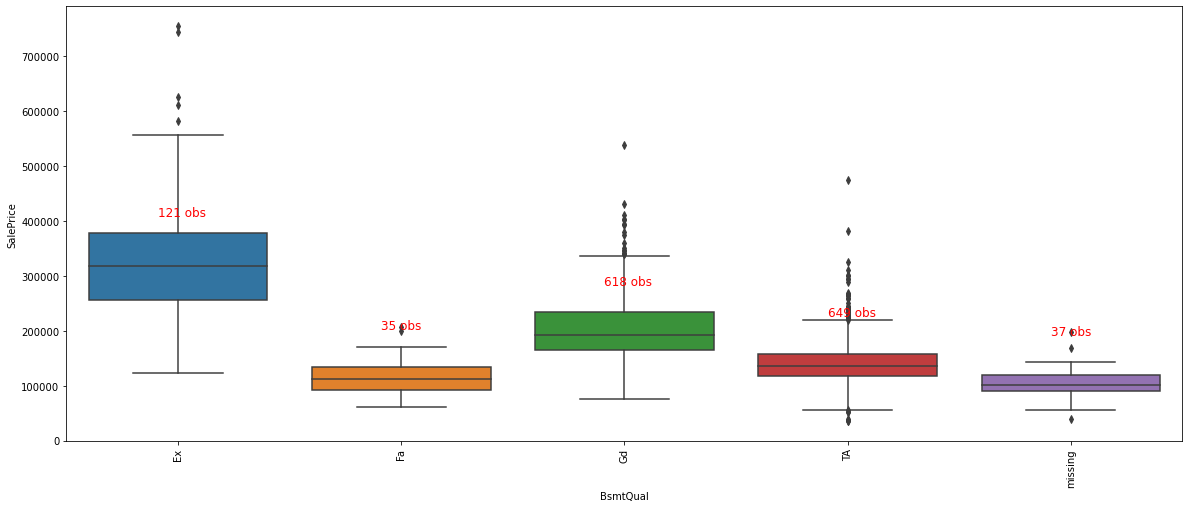

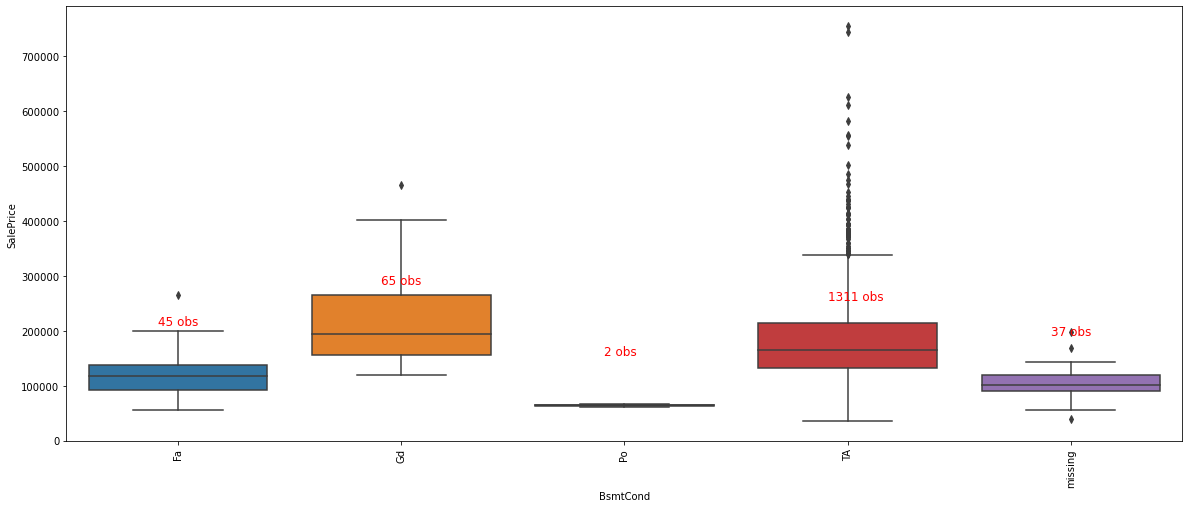

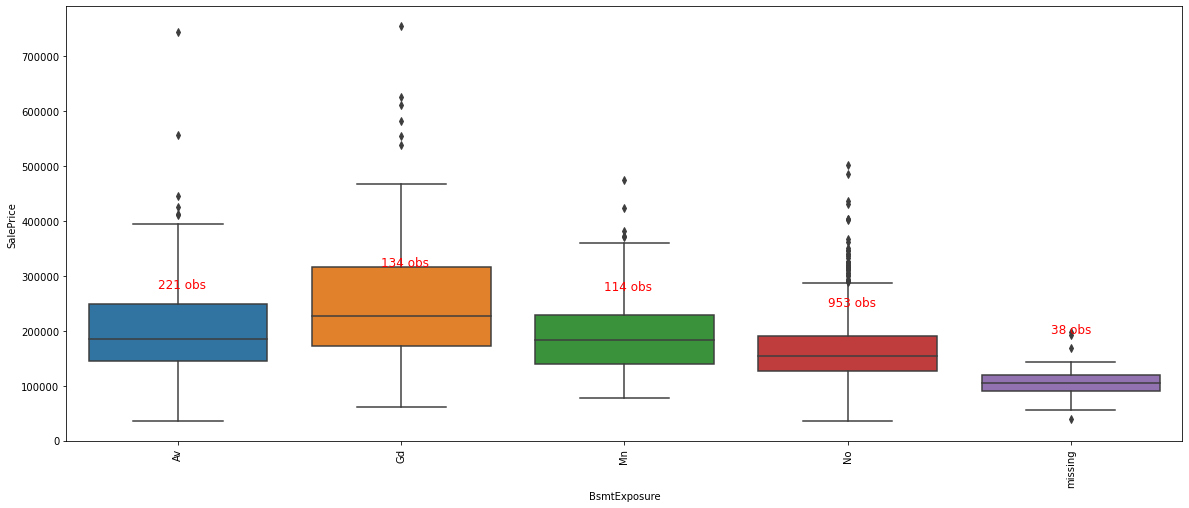

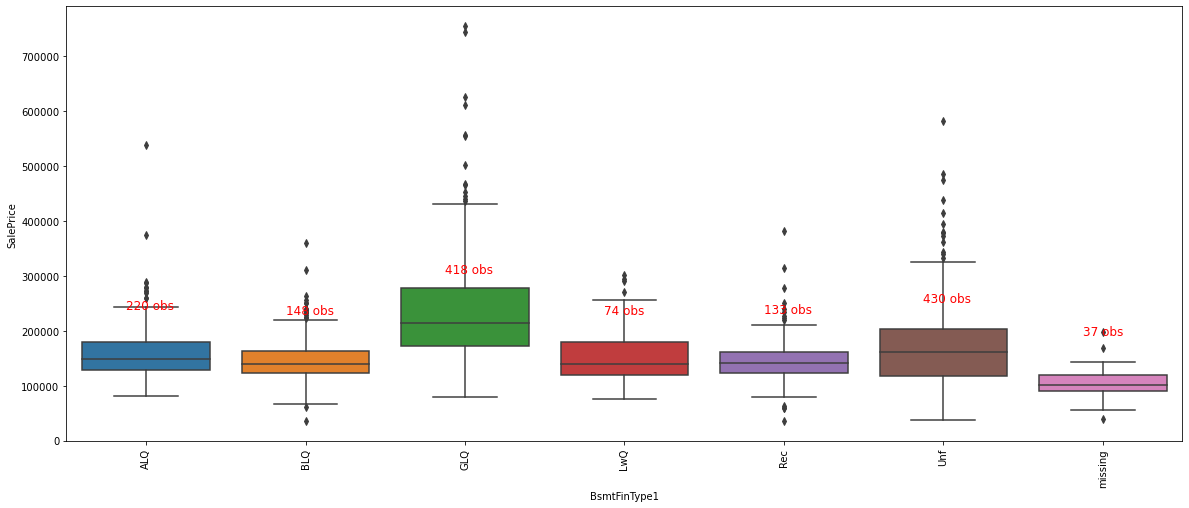

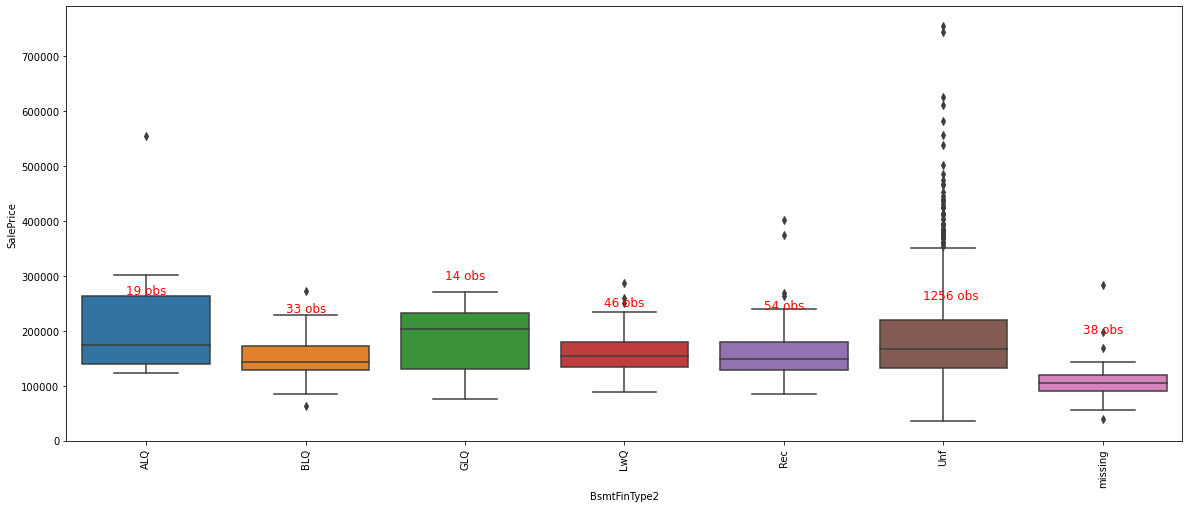

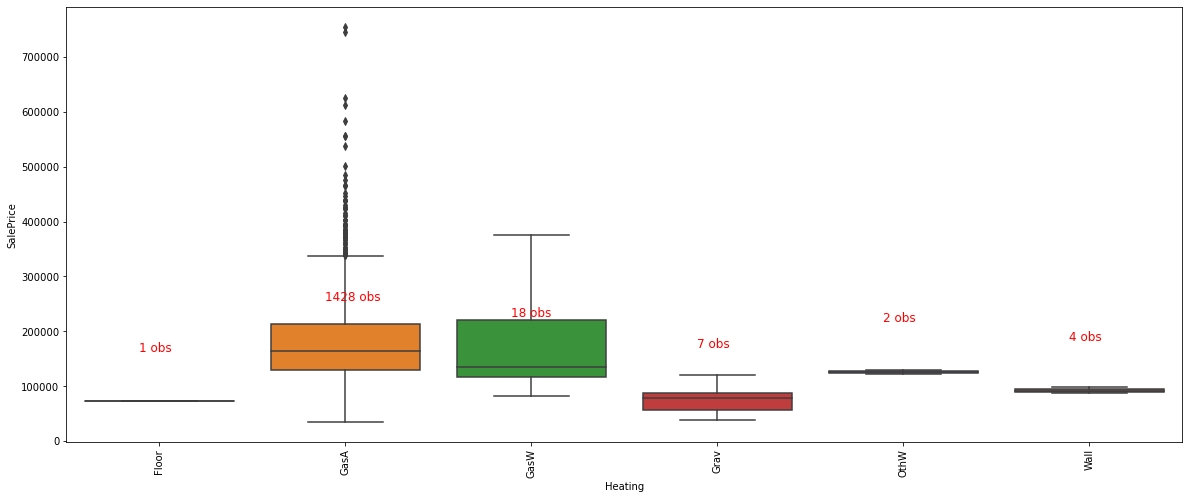

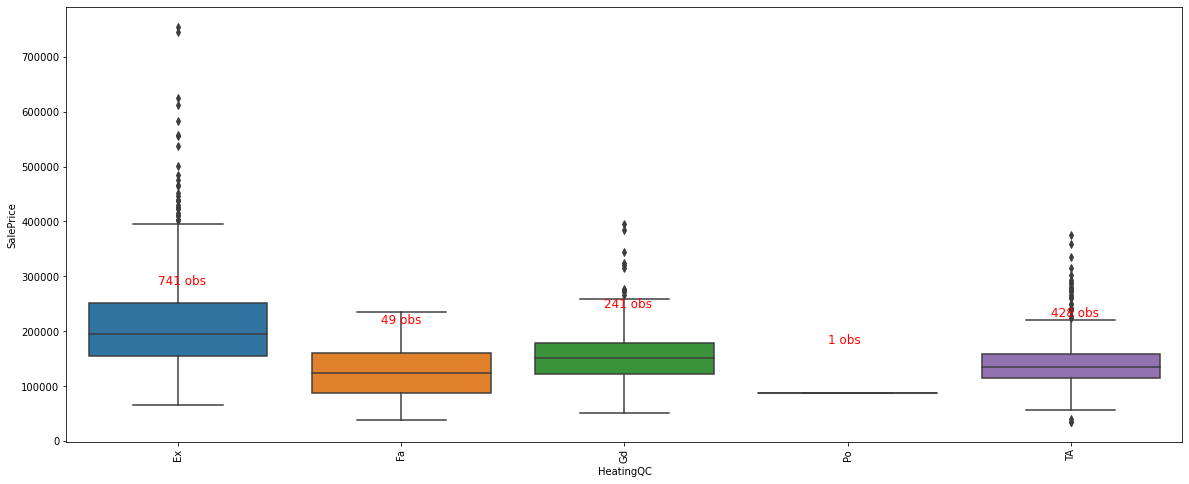

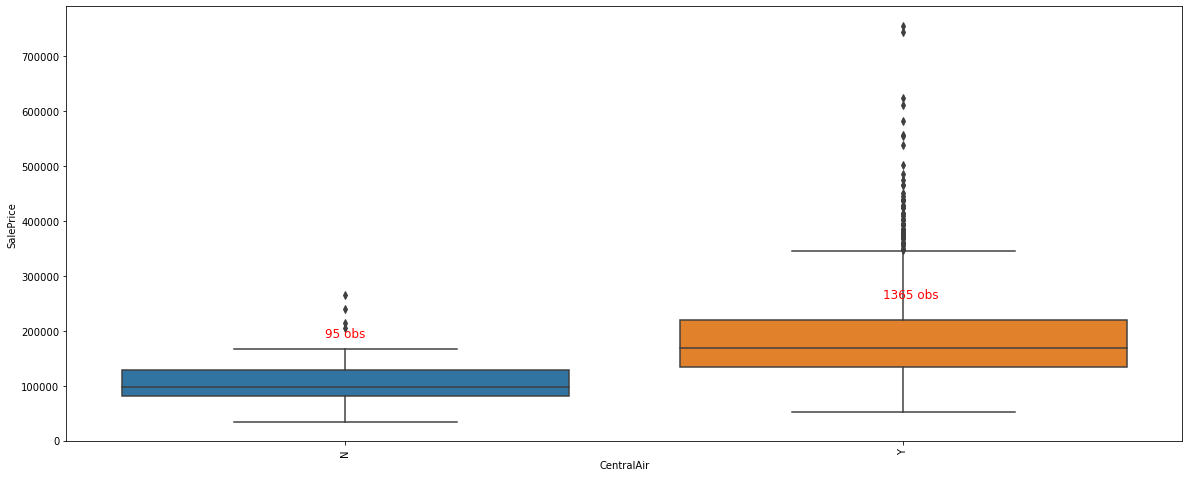

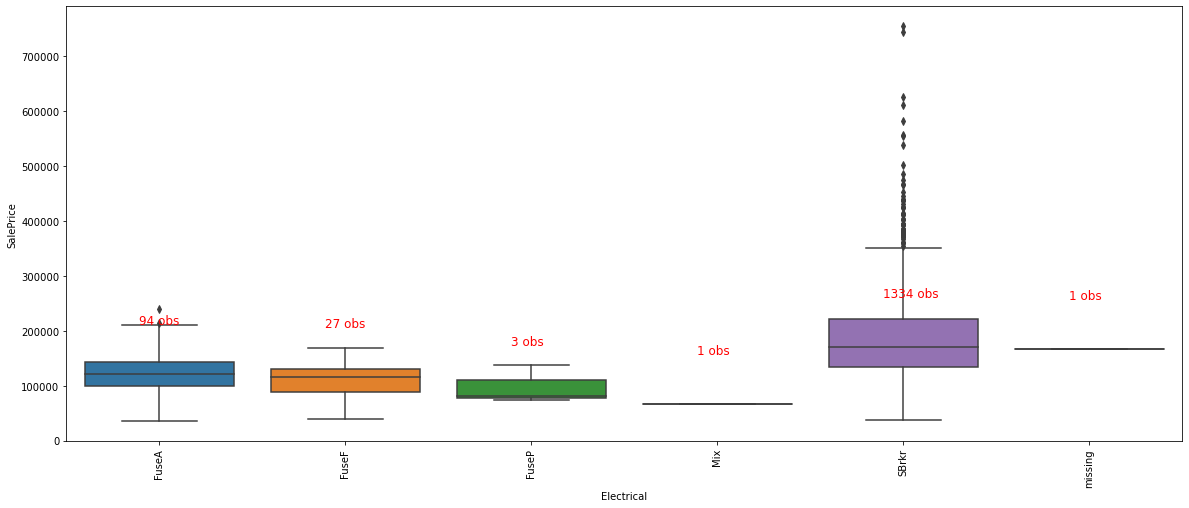

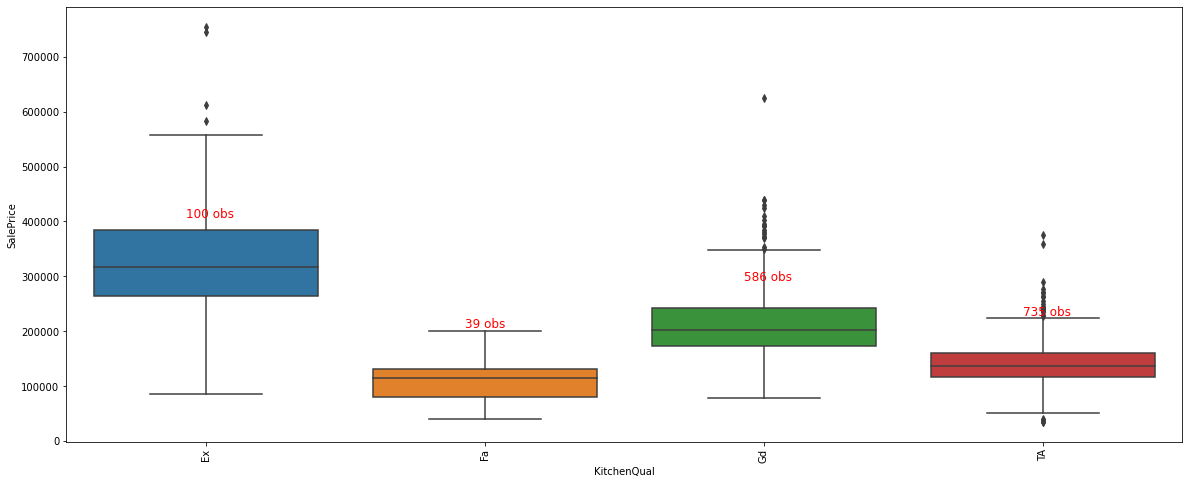

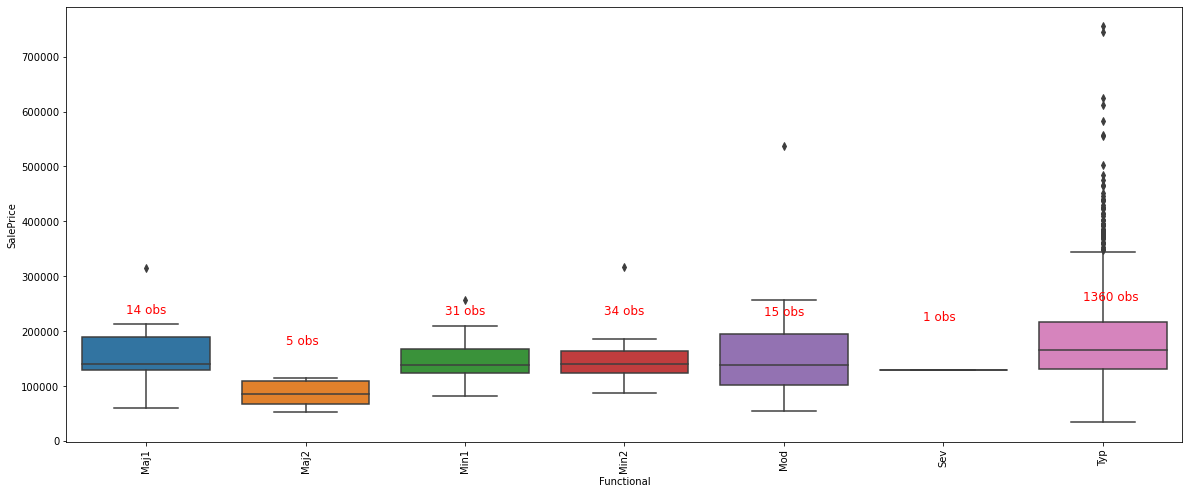

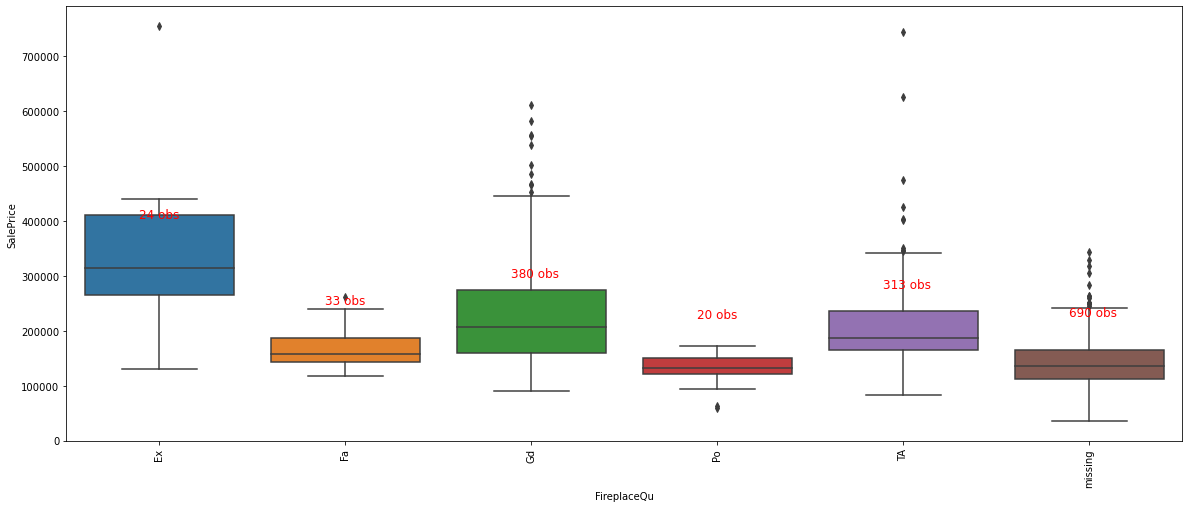

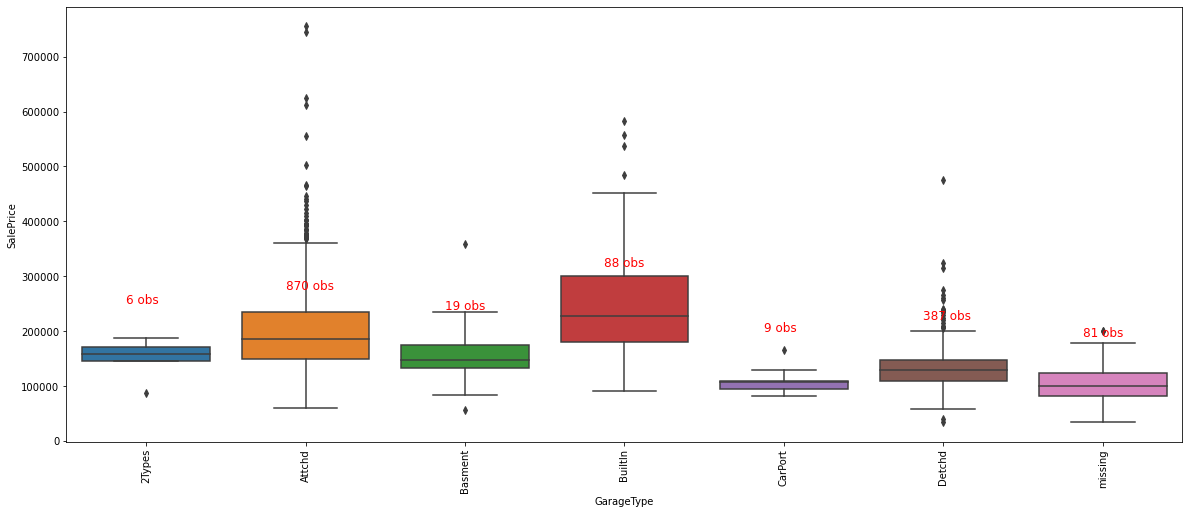

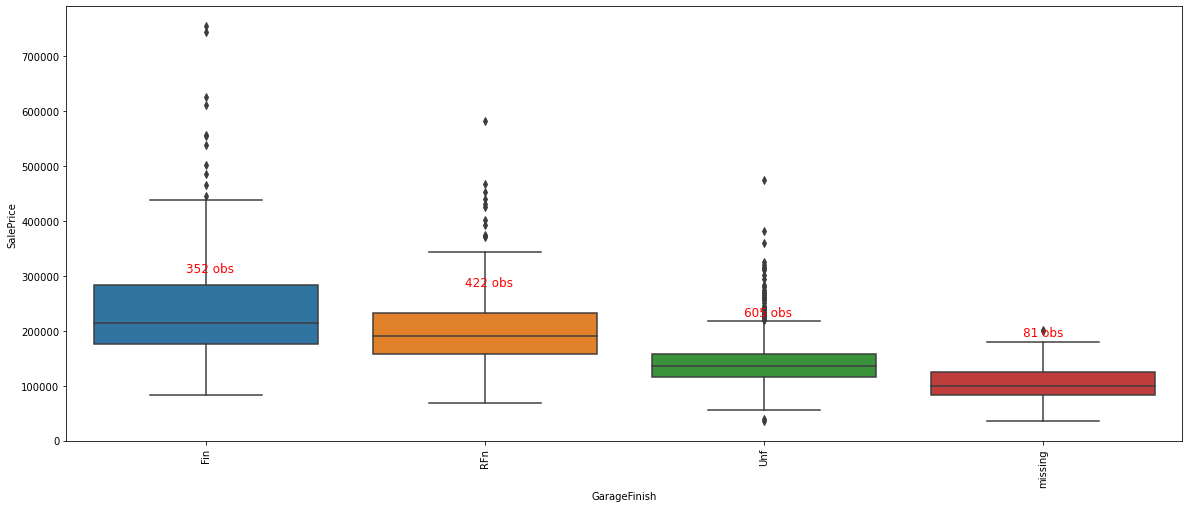

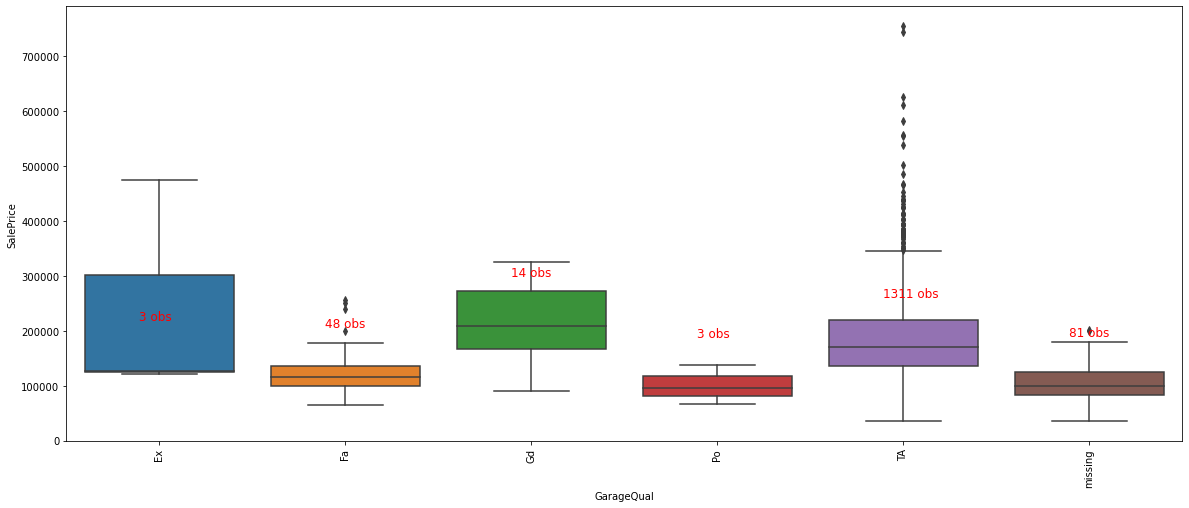

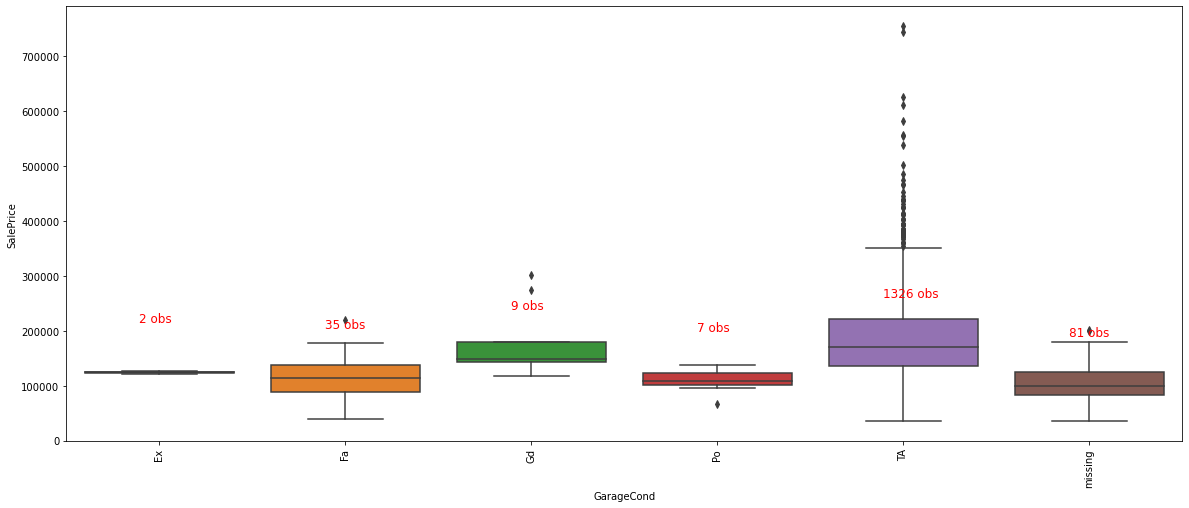

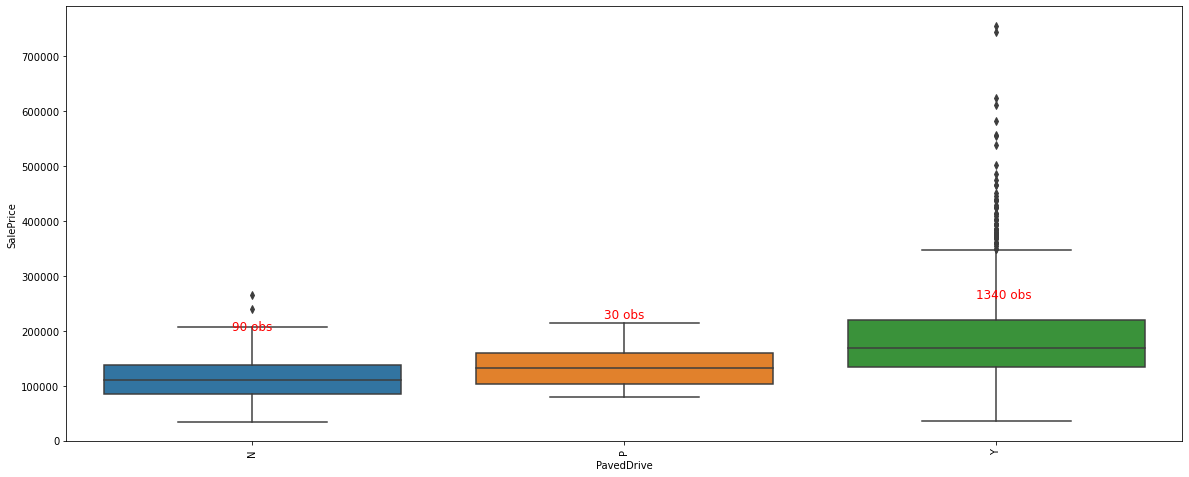

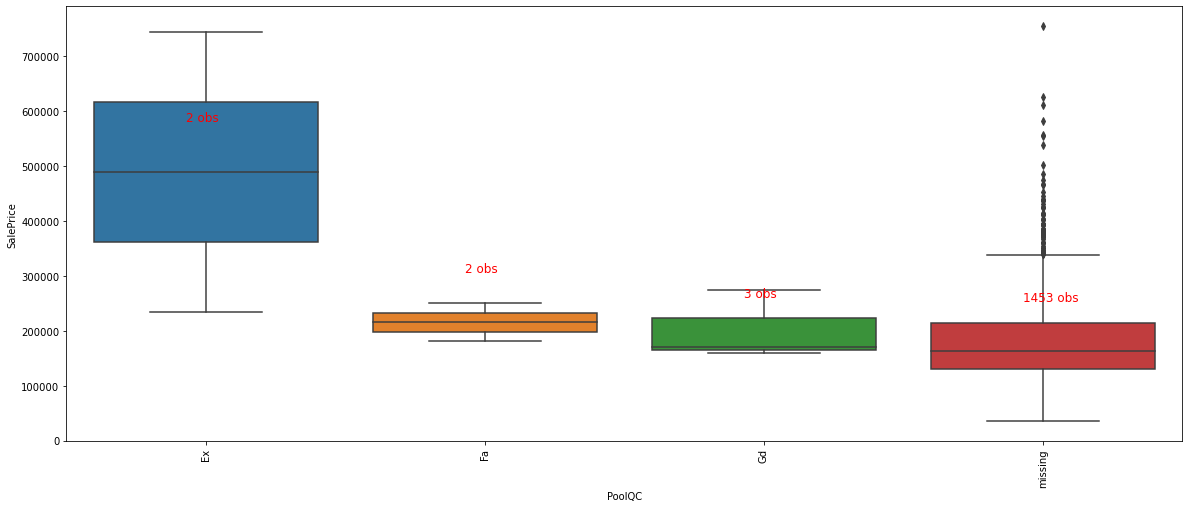

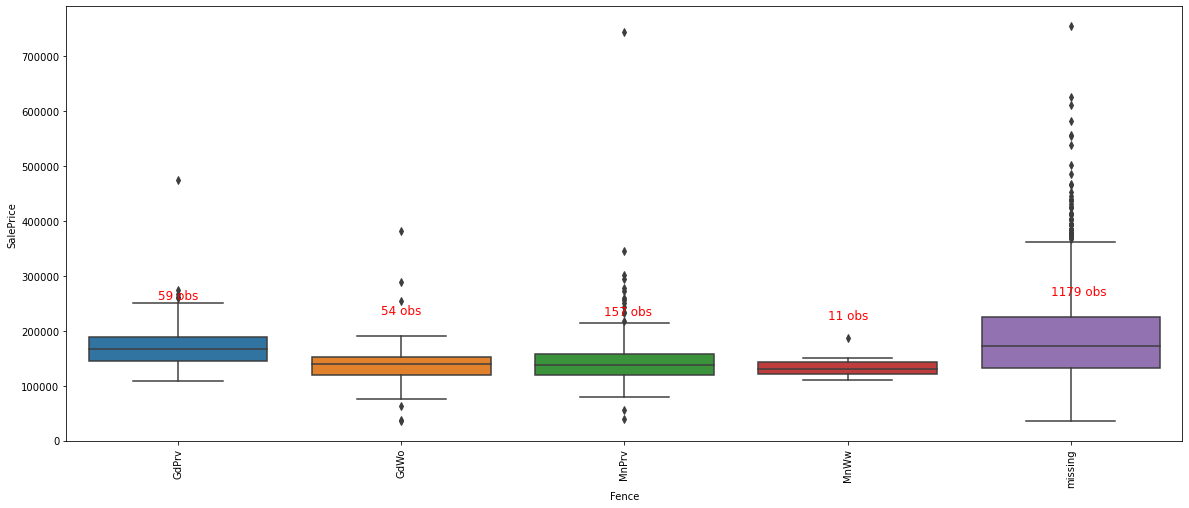

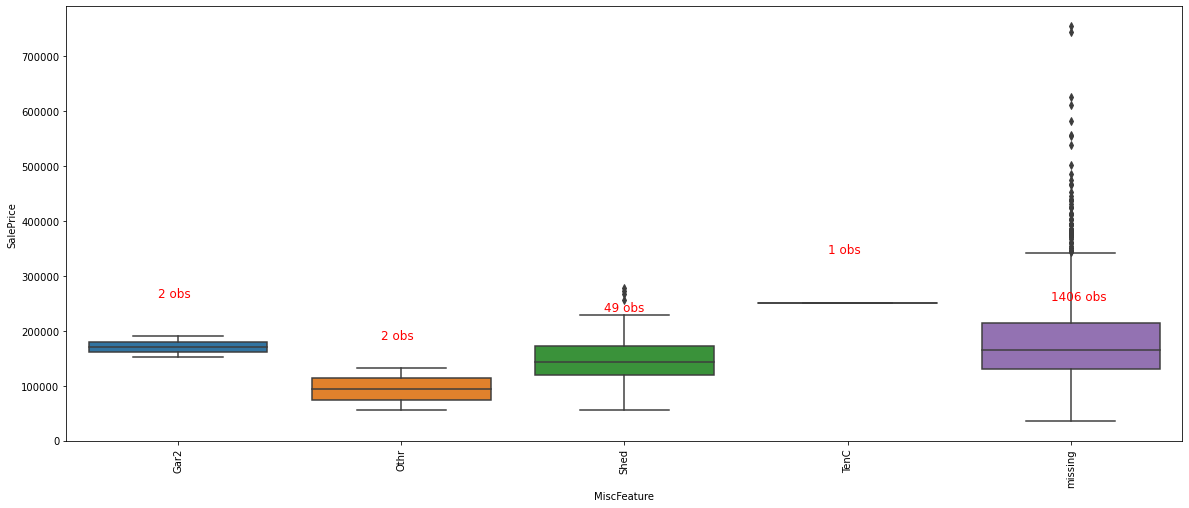

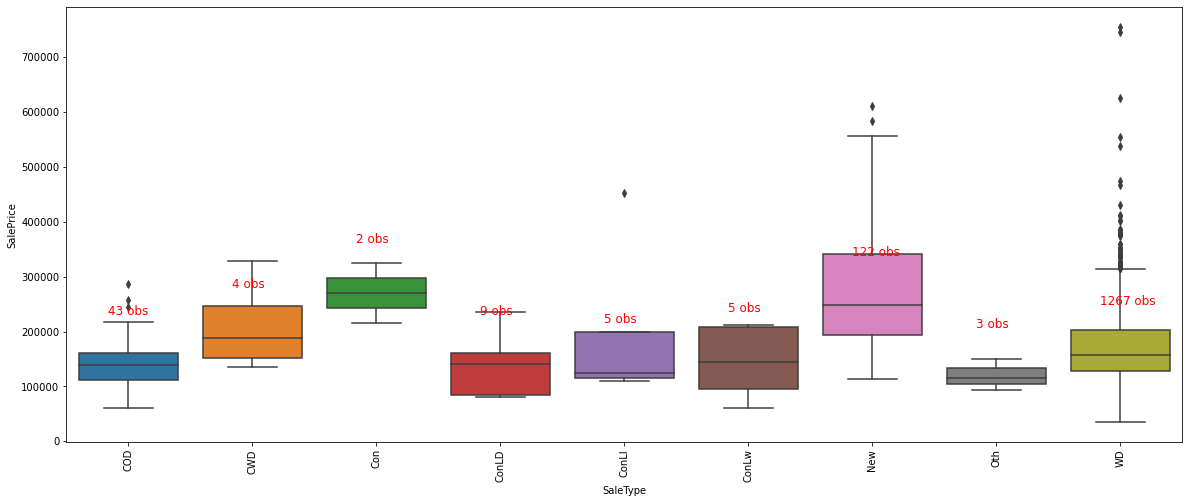

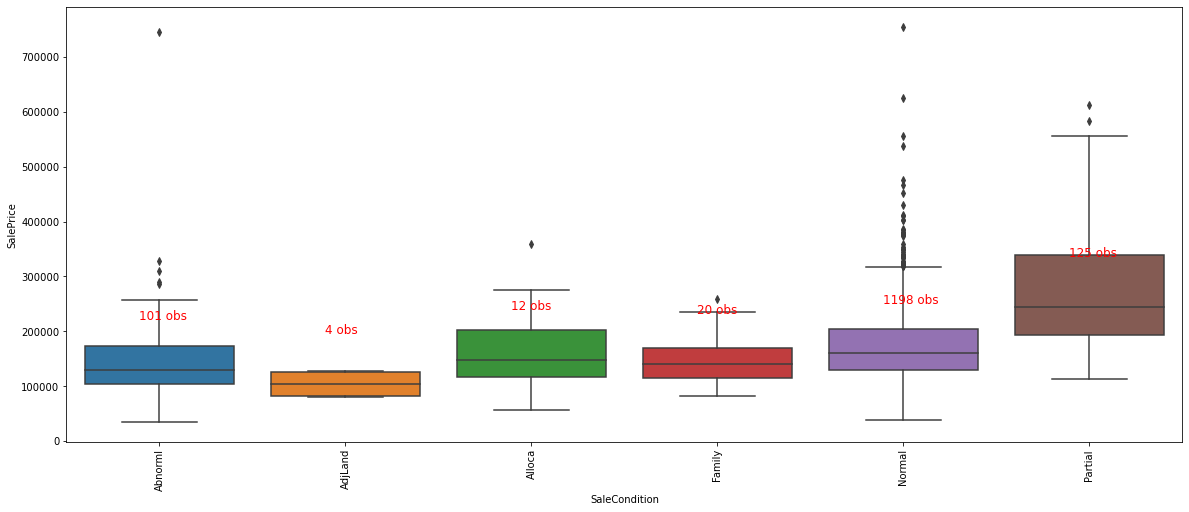

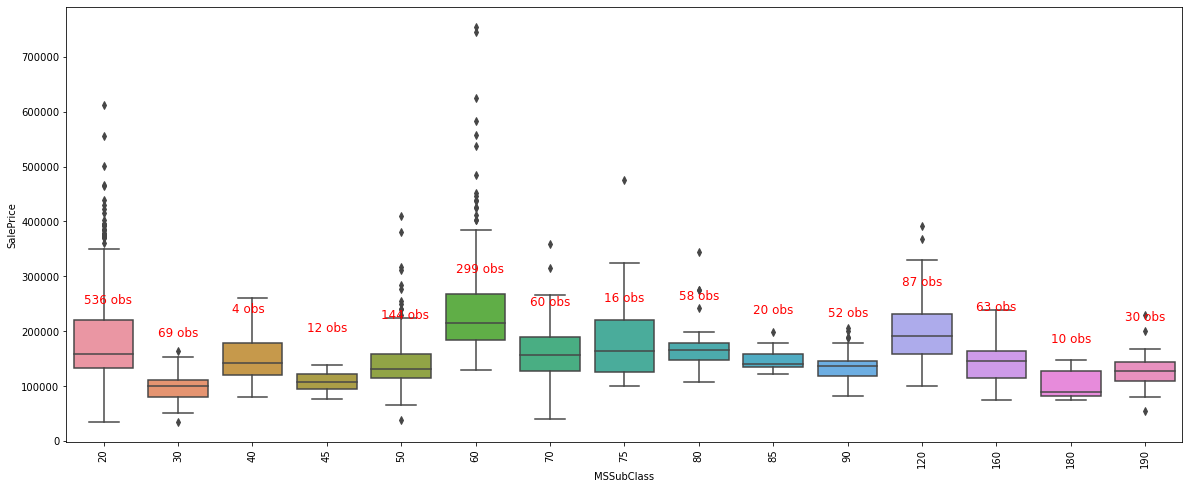

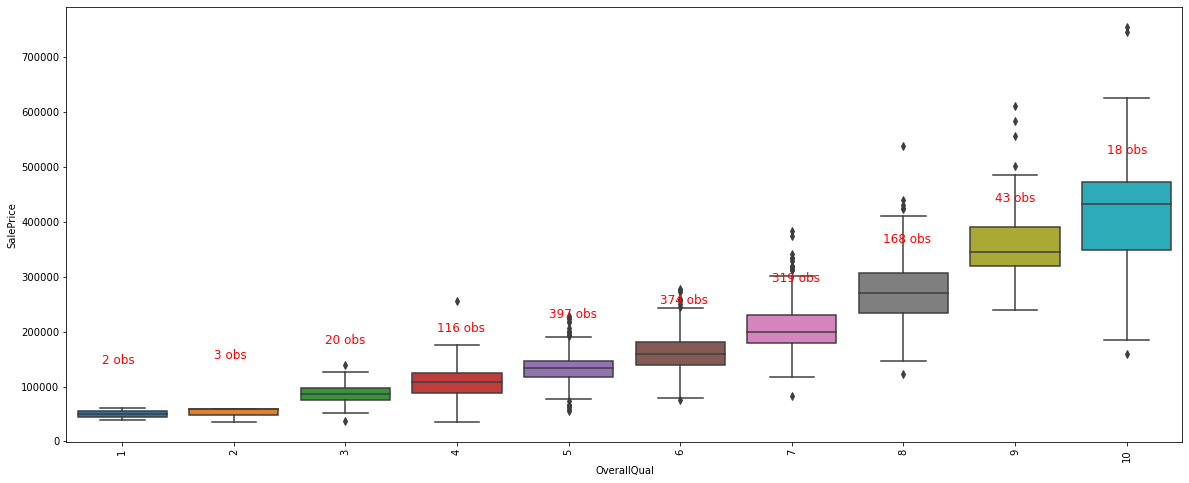

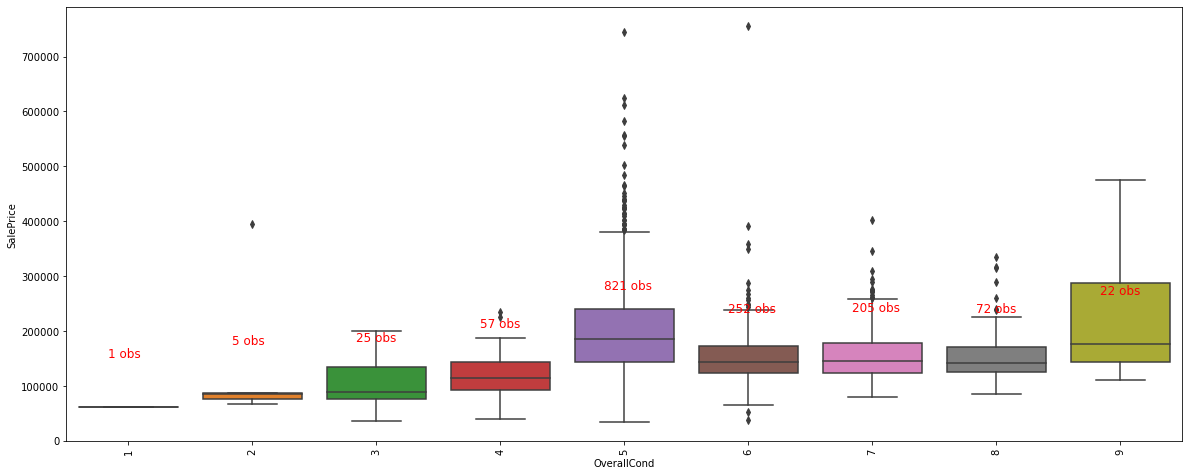

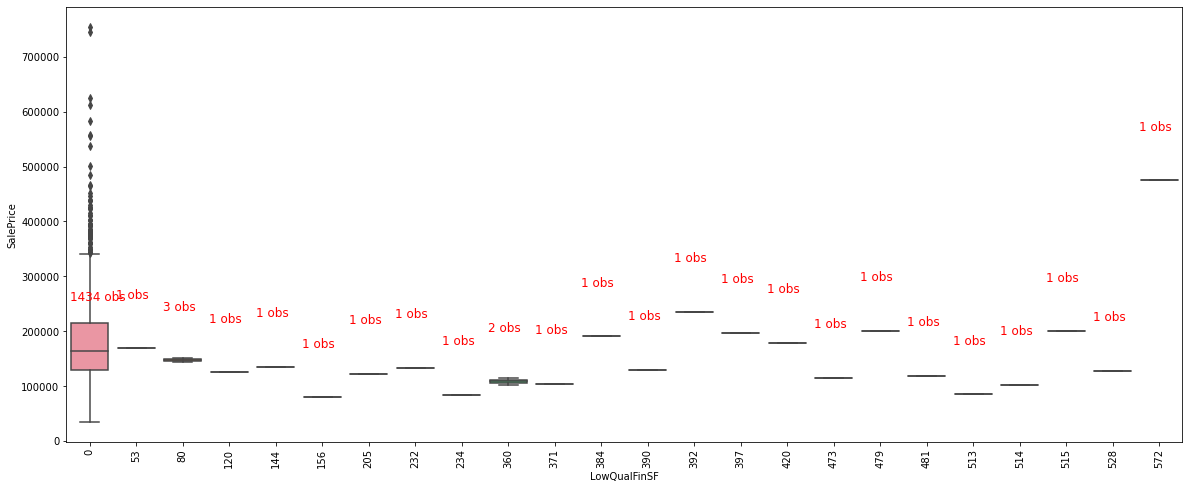

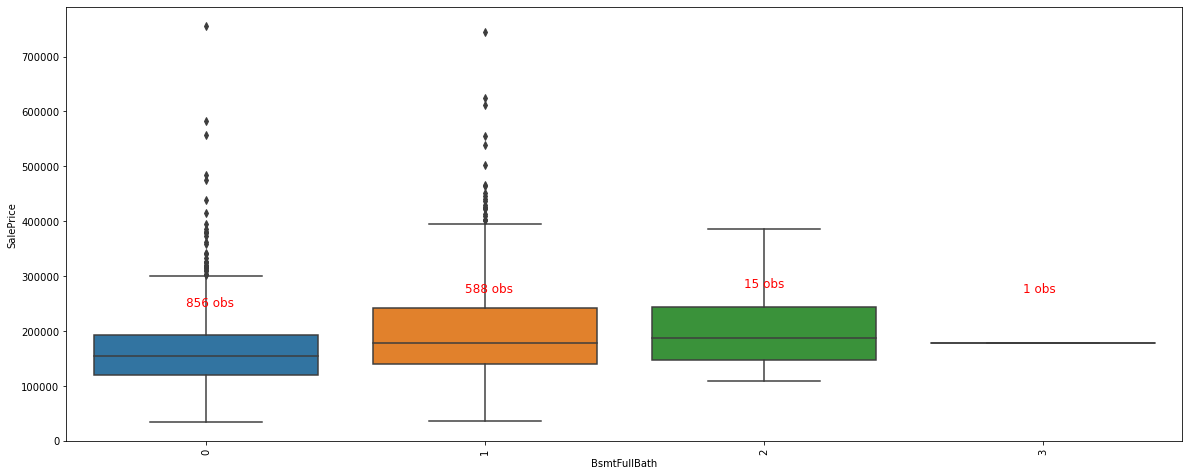

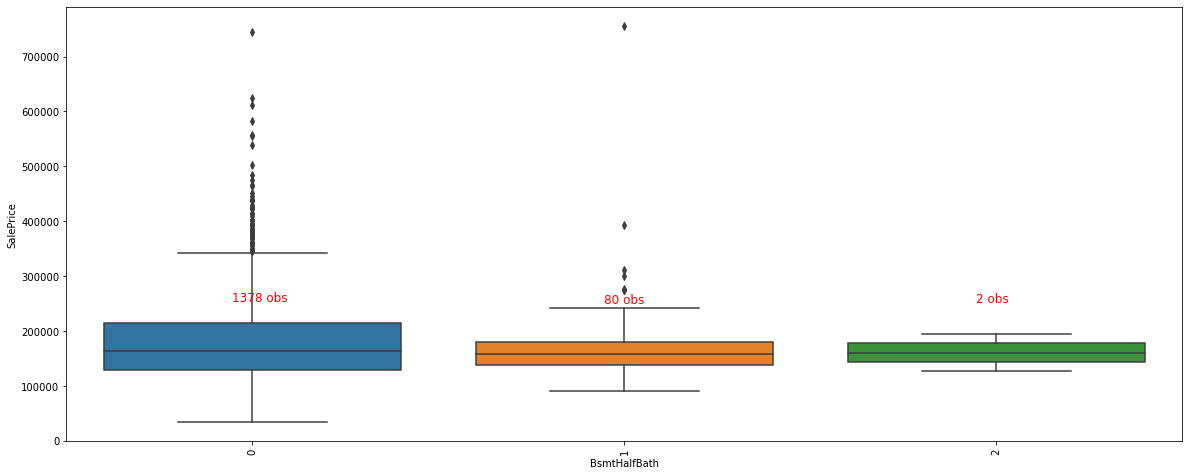

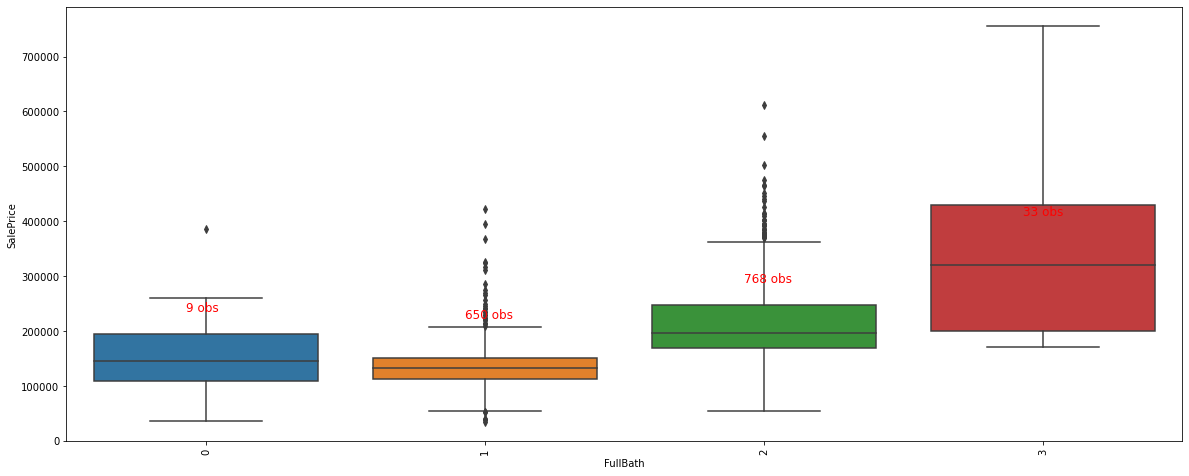

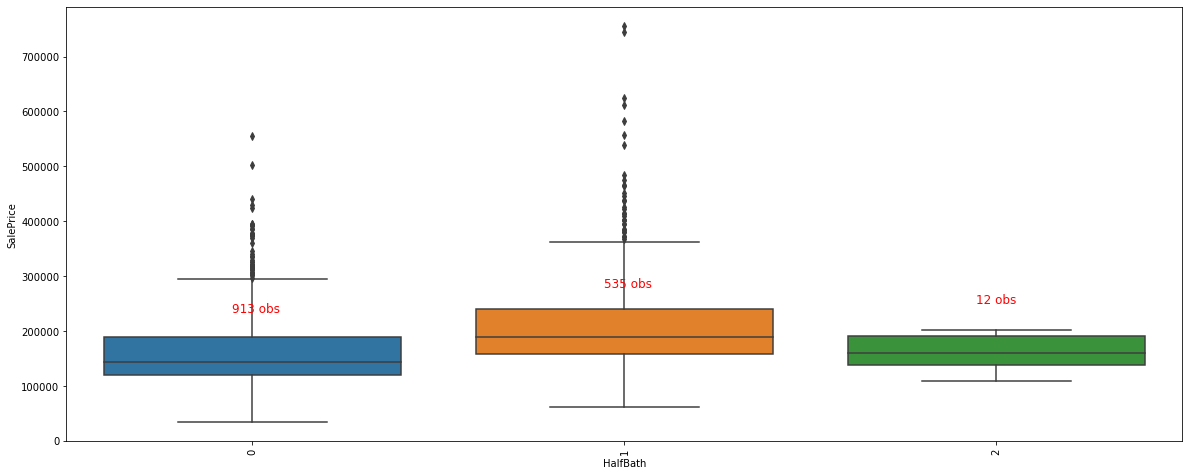

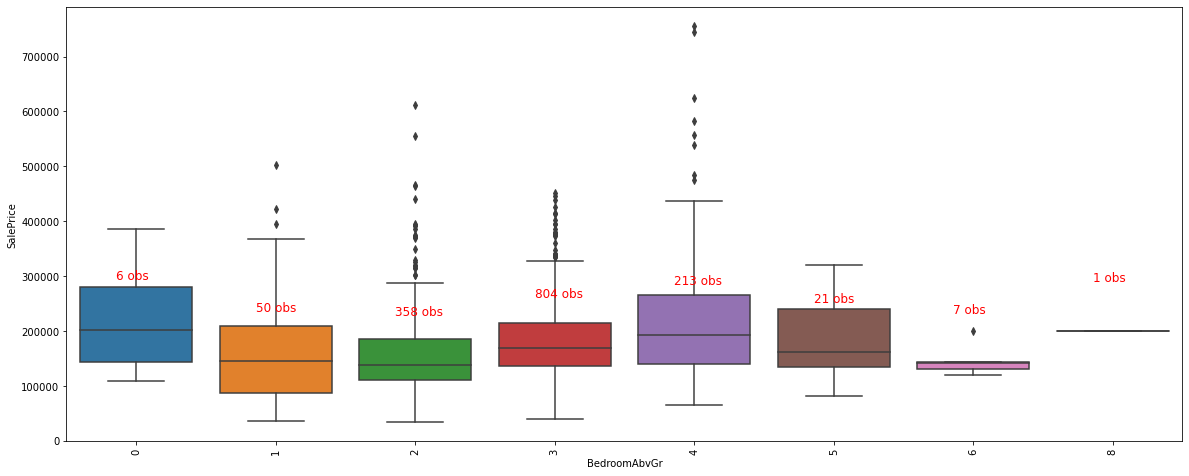

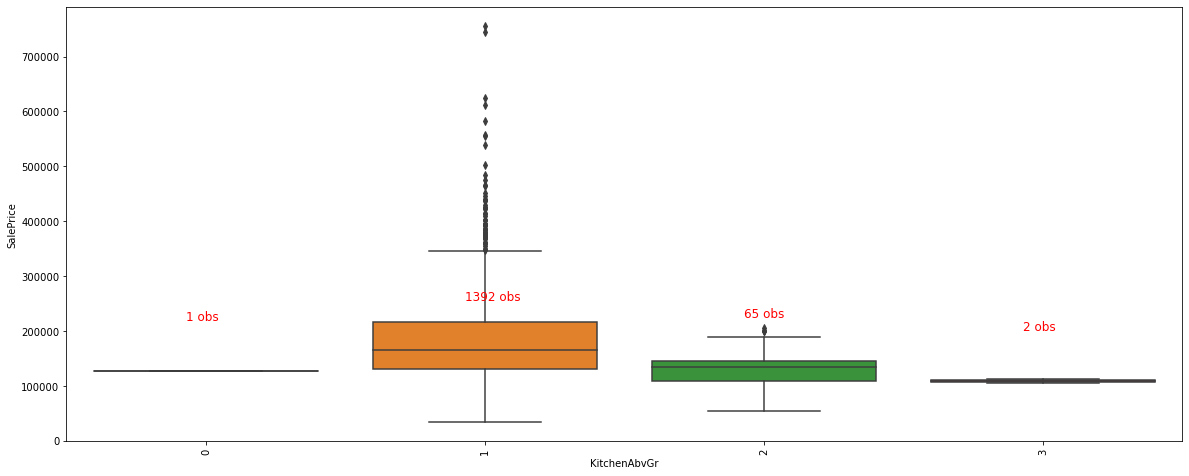

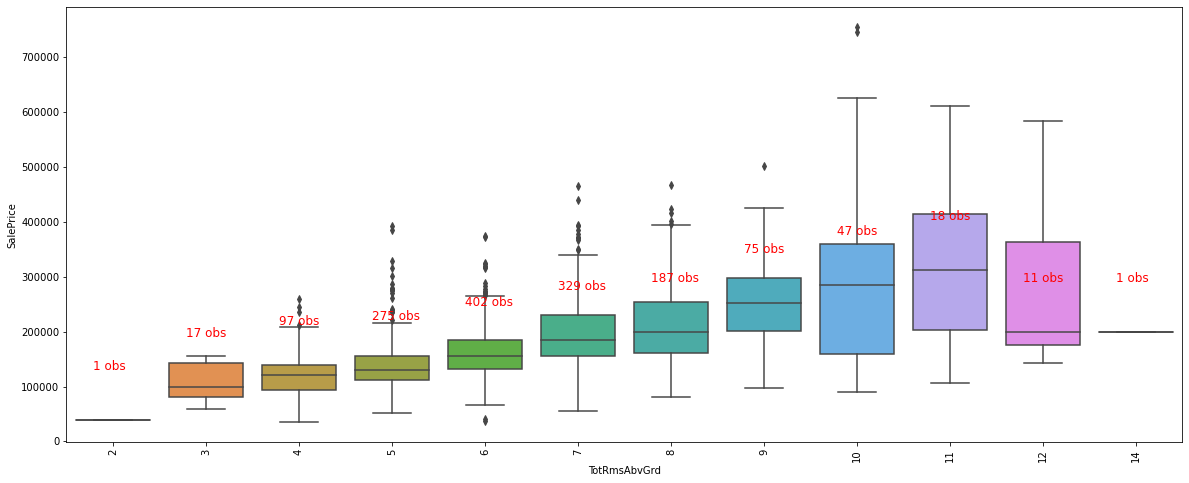

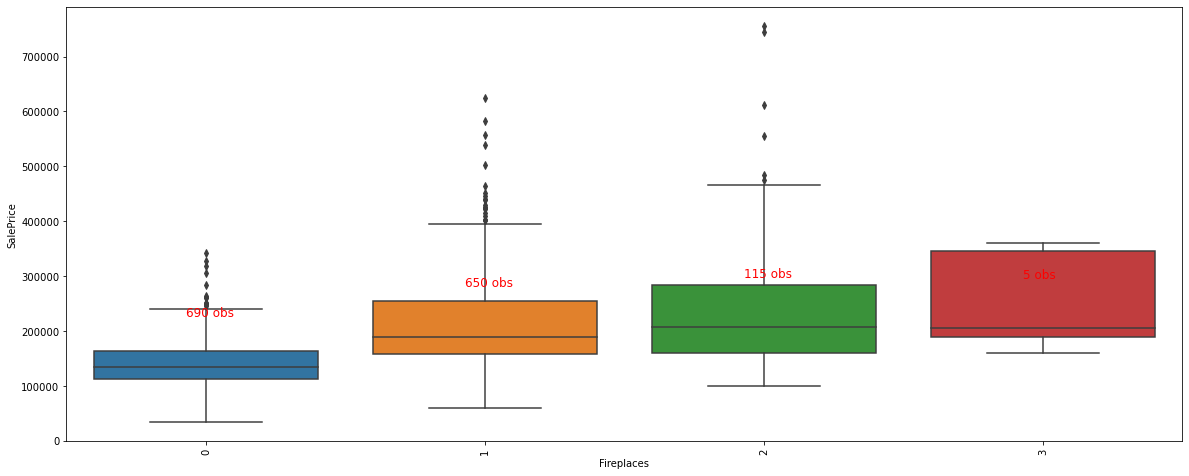

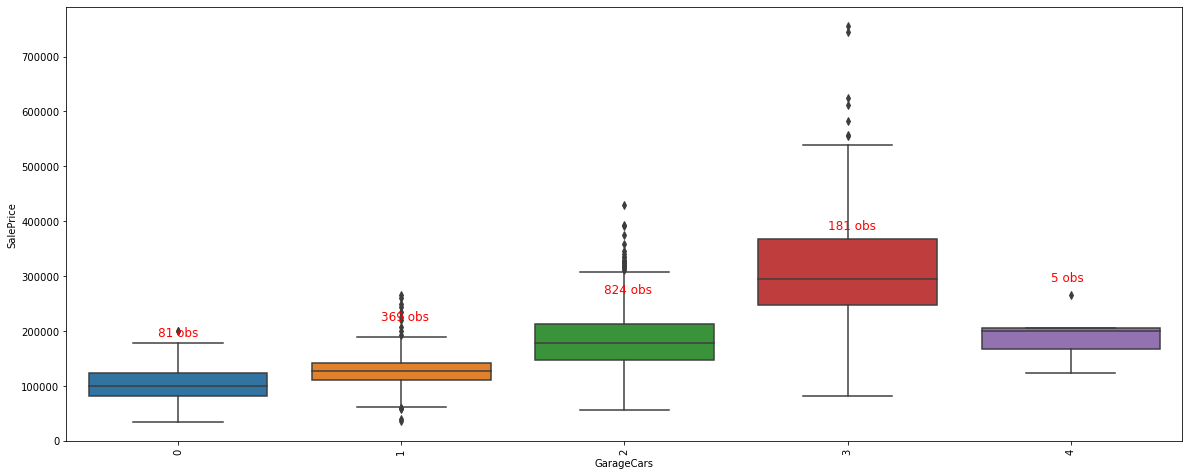

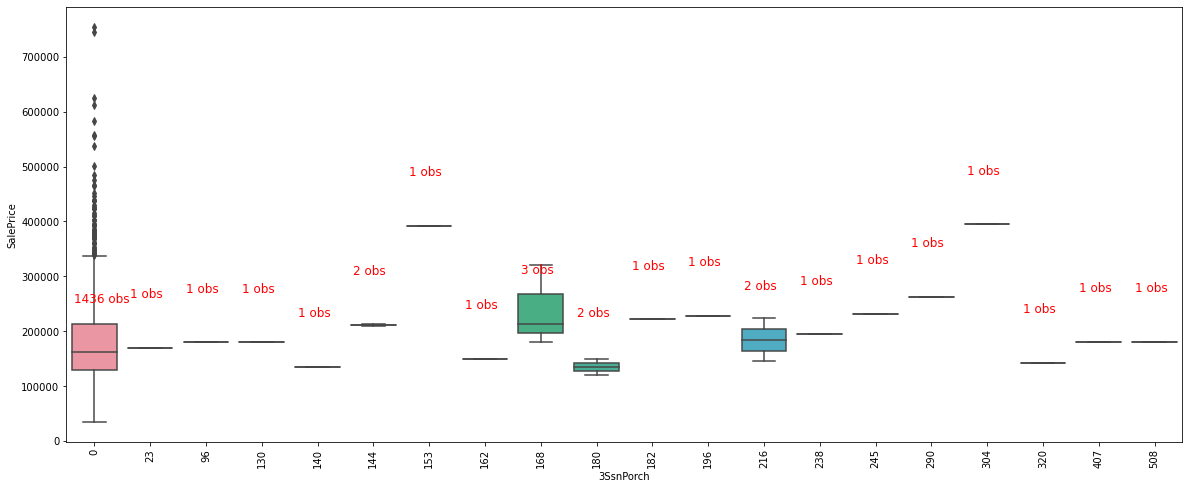

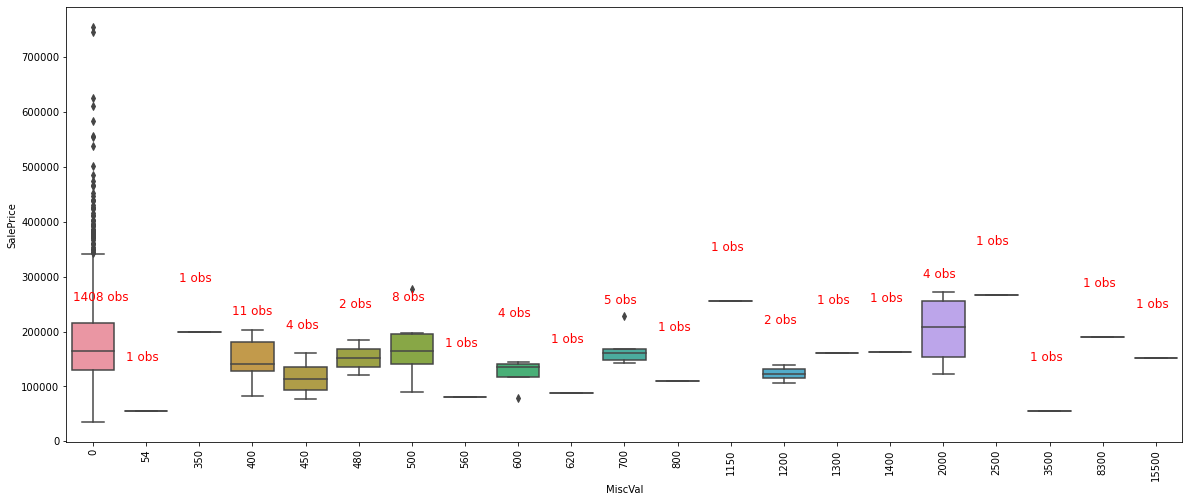

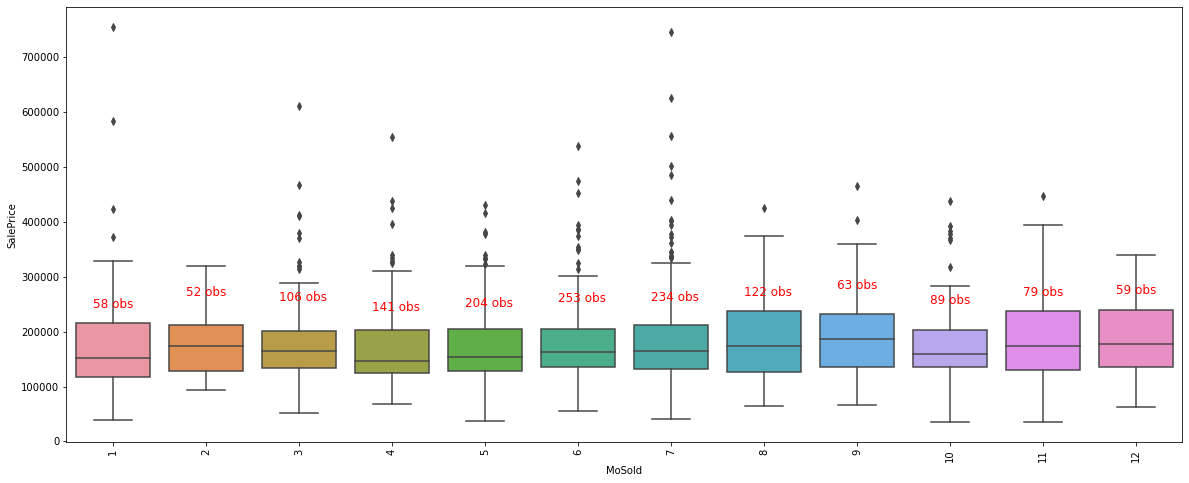

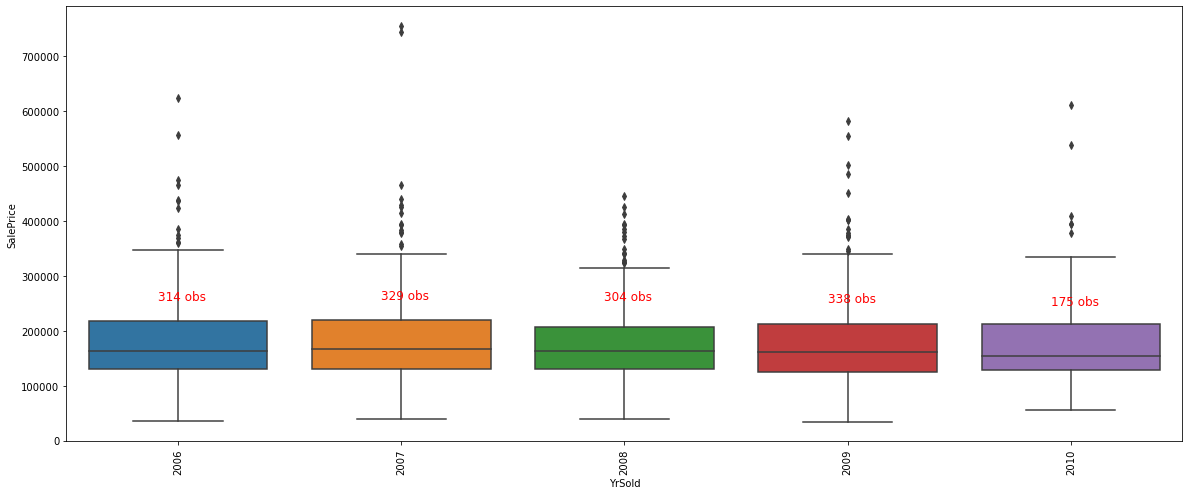

In [20]:
for x in qualitative:
    plt.rcParams.update({'figure.max_open_warning': 0})
    fig = plt.figure(figsize = (20, 8))
    ax = fig.add_subplot()
    ax = sns.boxplot(x=x, y="SalePrice", data=train)
    plt.xticks(rotation=90)
    for v, tick in zip(sorted(train[x].unique()),ax.get_xticks()):
        ax.annotate("{} obs".format(len(train[train[x]==v])), 
               xy = (tick, train[train[x]==v]["SalePrice"].median()),
               xytext = (-20, 50),
               color="red",
               textcoords = "offset points",
               fontsize = 12)

Looking through the boxplots we can drop the following features as they either have very little impact on SalePrice or they are represented by other features.

In [21]:
train.drop(columns=["LowQualFinSF", "3SsnPorch", "RoofMatl", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
                   "Condition2", "RoofStyle", "Exterior2nd", "ExterCond", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                   "Heating", "Electrical", "Functional", "FireplaceQu", "GarageType", "GarageQual", "GarageCond", "PoolQC", "Fence",
                   "MiscFeature", "SaleType", "OverallCond", "LowQualFinSF", "BsmtHalfBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
                   "MiscVal", "MoSold", "YrSold"], inplace=True)

We will also do some feature engineering on GarageCars, Fireplaces, Foundation, SaleCondition, BsmtFullBath, FullBath, BsmtFullBath and TotRmsAbvGrd as following

In [22]:
train['Garage'] = train['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
train['Fireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train['Foundations'] = train['Foundation'].apply(lambda x: 1 if x == "PConc" else 0)
train['SaleCond'] = train['SaleCondition'].apply(lambda x: 1 if x == "Partial" else 0)
train['BsmtBath'] = train['BsmtFullBath'].apply(lambda x: 1 if x > 0 else 0)
train['Bath'] = train['FullBath'].apply(lambda x: 1 if x > 0 else 0)
train['BsmtBath'] = train['BsmtFullBath'].apply(lambda x: 1 if x > 0 else 0)
train["Rooms"] = train["TotRmsAbvGrd"].apply(lambda x: 3 if x > 8 else(2 if x > 5 else 0))

In [23]:
train.drop(columns=['GarageCars', 'Fireplaces', 'Foundation', 'SaleCondition', 'BsmtFullBath',
                    'FullBath', 'BsmtFullBath', "TotRmsAbvGrd"], inplace=True)

## Date features

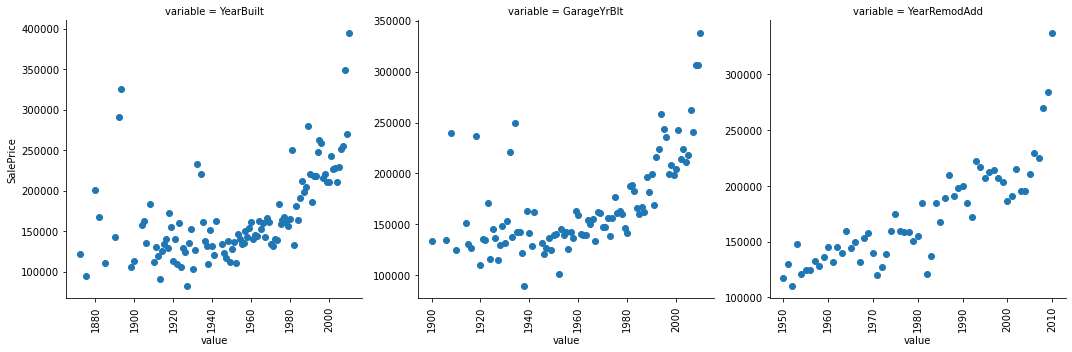

In [24]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ax.scatter(x,y)
    plt.xticks(rotation=90)

f_date = pd.melt(train, id_vars=['SalePrice'], value_vars=date)
f_date = f_date.groupby(["variable", "value"]).mean().sort_values(by="SalePrice", ascending=False).reset_index()
g = sns.FacetGrid(f_date, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(pairplot, "value", "SalePrice")

there is a strong positive correlation between YearBuilt, YearRemodAdd and SalePrice. HOwever there is a significant sharp increase for units built after 1990 or remodeled after 2000. Let's create boolean variables to reflect that 

In [25]:
train['After1990'] = train['YearBuilt'].apply(lambda x: 1 if x > 1990 else 0)
train['After2000'] = train['YearRemodAdd'].apply(lambda x: 1 if x > 2000 else 0)

In [26]:
train.drop(columns=['GarageYrBlt'], inplace=True)

After dropping and converting some of the features we will now update out feature lists

In [27]:
qualitative = ['MSSubClass', 'MSZoning', 'Street',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'Exterior1st', 'MasVnrType', 'ExterQual',
       'BsmtQual', 'HeatingQC', 'CentralAir', 
       'KitchenQual', 'GarageFinish', 'PavedDrive']

In [28]:
quantitative = ["LotFrontage", 'LotArea','1stFlrSF', 'GrLivArea', 'YearBuilt', 'YearRemodAdd']

In [29]:
boolean = ['Basement', '2ndFloor', 'Porch', 'Garage', 'Pool', 'Fireplace',
       'Foundations', 'SaleCond', 'BsmtBath', 'Bath', 'Rooms', 'After1990',
       'After2000']

# 3- Missing Values and Outliers 

#### Missing values

In [30]:
train.isnull().sum().sort_values(ascending=False)

LotFrontage     259
After2000         0
HouseStyle        0
BsmtQual          0
ExterQual         0
MasVnrType        0
Exterior1st       0
YearRemodAdd      0
YearBuilt         0
OverallQual       0
BldgType          0
After1990         0
Condition1        0
Neighborhood      0
Street            0
LotArea           0
MSZoning          0
MSSubClass        0
HeatingQC         0
CentralAir        0
1stFlrSF          0
GrLivArea         0
Rooms             0
Bath              0
BsmtBath          0
SaleCond          0
Foundations       0
Fireplace         0
Garage            0
Pool              0
Porch             0
2ndFloor          0
Basement          0
SalePrice         0
PavedDrive        0
GarageFinish      0
KitchenQual       0
Id                0
dtype: int64

At this point it seems that only one feature has missing values which is LotFrontage. Since LotFrontage should be linearly dependant on LotArea we will study that relationship and try to fill in the missing values.  

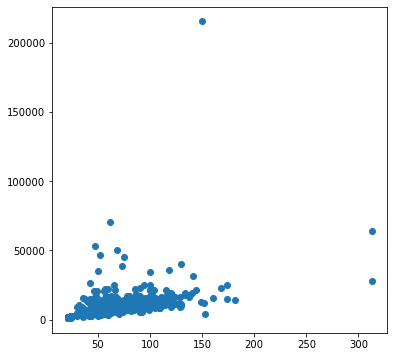

In [31]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.scatter(train.LotFrontage, train.LotArea)

Apart from a few outliers the realtionship between the 2 features seems quite linear

In [32]:
ratio = train[train["LotFrontage"].notnull()]["LotArea"].sum()/train[train["LotFrontage"].notnull()]["LotFrontage"].sum()
ratio

142.0657316058481

No all we have to do is divide the LotArea entries by 142,06 to get an estimation of the missing LotFrontage. It might seem as multicollinearity if we can derive one feature from another but remember this is only an estimation to fill in the missing values as best we can. The collinearity between LotFrontage and LotArea is below at 0,4 and there is still a lot of information to be derived from LotFrontage  

In [33]:
train["LotFrontage"].fillna(train[train["LotFrontage"].isnull()]["LotArea"]/ratio, inplace=True)

#### Outliers 

We will not deal with all of the outliers because it could get very complicated.There is however 2 features where dealing with the outliers is pretty simple so we will do that. If we look back at the pair plots for the countinous features we seethat 1stFlrSF has 1 outlier and LotArea has 4. We will proceed with deleting those observations from the data set. 

In [34]:
train.sort_values(by = 'LotArea', ascending = False)[0:4]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,BldgType,HouseStyle,...,Pool,Garage,Fireplace,Foundations,SaleCond,BsmtBath,Bath,Rooms,After1990,After2000
313,314,20,RL,150.000000,215245,Pave,Timber,Norm,1Fam,1Story,...,0,1,1,0,0,1,1,2,0,0
335,336,190,RL,1159.040946,164660,Grvl,Timber,Norm,2fmCon,1.5Fin,...,0,1,1,0,0,1,1,2,0,0
249,250,50,RL,1119.200234,159000,Pave,ClearCr,Norm,1Fam,1.5Fin,...,0,1,1,0,0,0,1,2,0,1
706,707,20,RL,810.533256,115149,Pave,ClearCr,Norm,1Fam,1Story,...,0,1,1,0,0,1,1,0,0,1


In [35]:
train = train.drop(train[train['Id'] == 314].index)
train = train.drop(train[train['Id'] == 336].index)
train = train.drop(train[train['Id'] == 250].index)
train = train.drop(train[train['Id'] == 707].index)

In [36]:
train.sort_values(by = '1stFlrSF', ascending = False)[0:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Neighborhood,Condition1,BldgType,HouseStyle,...,Pool,Garage,Fireplace,Foundations,SaleCond,BsmtBath,Bath,Rooms,After1990,After2000
1298,1299,60,RL,313.0,63887,Pave,Edwards,Feedr,1Fam,2Story,...,1,1,1,1,1,1,1,3,1,1


In [37]:
train = train.drop(train[train['Id'] == 497].index)

### ANOVA rankings and Categorical feature encoding

In order to rank the influence of the categorical features on our target value "SalePrice" we need to calculate the pvalue for each category using ANOVA approach(see more at https://bit.ly/3nLCiqu ). the smaller the pvalue the more influence the corresponding category/feature has on the "SalePrice".

If this method seems representative of the features impact, we will use it later of to encode the catefgorical features based on their influence on SalePrice

<ipython-input-38-a99309fcf53b>:17: RuntimeWarning: divide by zero encountered in true_divide
  a['disparity'] = np.log(1/a['pval'].values) #the pvalues are to small so disparity = log(1/pvalues) is better for plotting


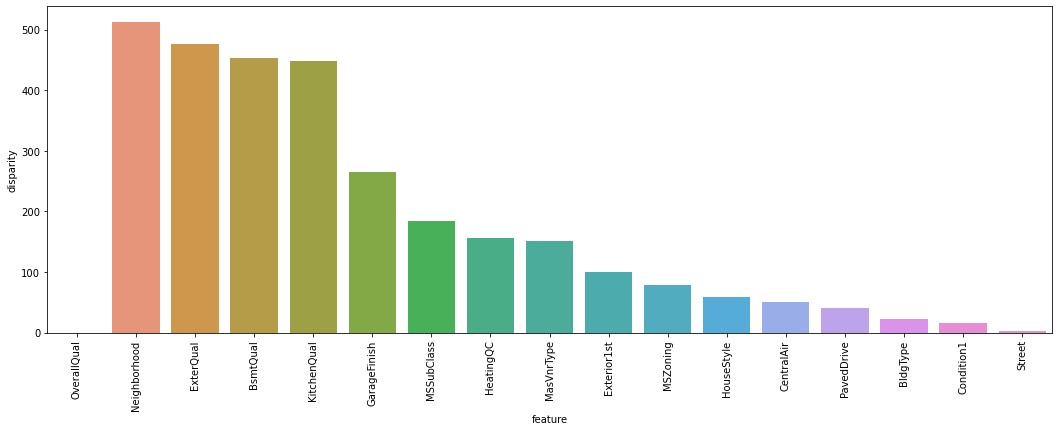

In [38]:
def anova(frame):
    anv = pd.DataFrame() #instatiates an empty dataframe called "anv"
    anv['feature'] = qualitative #qualitative is a list of qualitative features instatiated at the beginning of the notebook
    pvals = [] #creates an empty list
    for category in qualitative:
        samples = [] #for category in qualitative create an empty list called sample
        for value in frame[category].unique(): 
            s = frame[frame[category] == value]['SalePrice'].values #returns a list of SalePrice values for each unique value of the category
            samples.append(s) #appends the samples list with the SalesPrice values iterated in list s
        pval = stats.f_oneway(*samples)[1] #f_oneway gives a list with 2 values "statistic"[0] and "pvalue"[1]. We are only interested in the pvalue
                                           #this returns a list "pval" with all the pvalues of the different categories
        pvals.append(pval) #appends the list of pvalues to the empty list "pvals"
    anv['pval'] = pvals    #adds a column "pval" to the dataframe we are creating "anv"
    return anv.sort_values('pval')  #finally the returned dataframe will be sorted by pvalues in ascending order

a = anova(train)
a['disparity'] = np.log(1/a['pval'].values) #the pvalues are to small so disparity = log(1/pvalues) is better for plotting
                                            #the feature with the highest disparity is the feature with the most influence on "SalePrice"

plt.figure(figsize=(18, 6))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

Here is quick estimation of influence of categorical variable on SalePrice. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

The ranking seem to be consistent with the boxplot and most importantly common sense. 

No we encode the feature categories to numerical based on the degree of influence on the SalePrice. if the feature category increases the price it will have a higher encoding number and vice versa

In [39]:
def encode(frame, feature):
    ordering = pd.DataFrame() #instatiates an empty dataframe "ordering"
    ordering['val'] = frame[feature].unique()  #creates a column "val" in df "ordering" with the feature's unique values
    ordering.index = ordering.val  #make the column "val" the index of df "ordering"
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice'] #adds a column that lists the mean SalePrice for 
                                                                                            #each unique value in each category/feature
    ordering = ordering.sort_values('spmean') #sorts the df via spmean in ascending order
    ordering['ordering'] = range(1, ordering.shape[0]+1)  #adds a column "ordering" to the df where the feature value with the lowest spmean 
                                                          #has an ordering value of 1 and the feature value with the highest spmean has an ordering
                                                          #of "ordering.shape[0]+1" which is basically the number of unique values in each feature
    ordering = ordering['ordering'].to_dict()  #intsatiates a Dict where the key is the unique values of a feature and the value is the order number
                                               #see above example using feature "Neighborhood"
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o #adds a column "feature_E" to the original df "frame" and adds the corresponding 
                                                           #ordering number based on the unique value of that feature 
                                                           #for example in the case on the feature "Neighborhood" the ordering number 2 will be 
                                                           #filled when the value is "IDOTRR" and 13 when the value is "SawyerW" (see example above)
    
qual_encoded = []
for q in qualitative:  
    encode(train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSSubClass_E', 'MSZoning_E', 'Street_E', 'Neighborhood_E', 'Condition1_E', 'BldgType_E', 'HouseStyle_E', 'OverallQual_E', 'Exterior1st_E', 'MasVnrType_E', 'ExterQual_E', 'BsmtQual_E', 'HeatingQC_E', 'CentralAir_E', 'KitchenQual_E', 'GarageFinish_E', 'PavedDrive_E']


In [40]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'MasVnrType', 'ExterQual',
       'BsmtQual', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'KitchenQual', 'GarageFinish', 'PavedDrive', 'SalePrice', 'Basement',
       '2ndFloor', 'Porch', 'Pool', 'Garage', 'Fireplace', 'Foundations',
       'SaleCond', 'BsmtBath', 'Bath', 'Rooms', 'After1990', 'After2000',
       'MSSubClass_E', 'MSZoning_E', 'Street_E', 'Neighborhood_E',
       'Condition1_E', 'BldgType_E', 'HouseStyle_E', 'OverallQual_E',
       'Exterior1st_E', 'MasVnrType_E', 'ExterQual_E', 'BsmtQual_E',
       'HeatingQC_E', 'CentralAir_E', 'KitchenQual_E', 'GarageFinish_E',
       'PavedDrive_E'],
      dtype='object')

# 4-Model Deployment 

We will first split train dataframe between train and test data using the train_test_split method. 10% test data and 90% train data due to the relatively low number of observations (1460).

We will also need to standardize the features using the standardscaler() method before fitting the data.

We will compare the follwing 4 regression models and choose the most accurate:

- Lasso
- Ridge
- SGD Regressor
- Random Forest Regressor
- Gradient Boosting Regressor

In [41]:
from sklearn.model_selection import train_test_split

X = train[qual_encoded + quantitative + boolean]
y = train["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [43]:
sc.transform(X_train)
sc.transform(X_test);

In [44]:
from sklearn import linear_model
lasso = linear_model.Lasso()
from sklearn.linear_model import Ridge
ridge = Ridge()
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [46]:
models = [lasso, ridge, sgd, forest, gbr]

In [47]:
def get_name(list_):
    name =[x for x in globals() if globals()[x] is list_][0]
    return name

In [48]:
for model in models:
    model.fit(X_train, y_train)
    print(get_name(model), "done")

lasso done
ridge done
sgd done
forest done
gbr done


In [49]:
y_hat_sgd = sgd.predict(X_test)
y_hat_lasso = lasso.predict(X_test)
y_hat_ridge = ridge.predict(X_test)
y_hat_forest = forest.predict(X_test)
y_hat_gbr = gbr.predict(X_test)

In [50]:
predictions = [y_hat_lasso, y_hat_sgd, y_hat_ridge, y_hat_forest, y_hat_gbr]

In [51]:
from sklearn.metrics import mean_squared_error
for prediction in predictions:
    print (get_name(prediction), "RMSE: ", np.sqrt(mean_squared_error(y_test, prediction)))

y_hat_lasso RMSE:  41161.37987970997
y_hat_sgd RMSE:  4.104506981691722e+16
y_hat_ridge RMSE:  40583.53993964646
y_hat_forest RMSE:  31911.262748783924
y_hat_gbr RMSE:  27346.661045860703


#### The Gradient Boosting Regressor yielded the best result. In case you are using this notebook to submit to the kaggle competion, here is how to proceed with getting the test data in shape. 

##### Missing values

In [52]:
missing_test = test[qualitative].isnull().sum()
missing_test = missing_test[missing_test > 0]
missing_test.sort_values(ascending=False, inplace=True)
missing_test

GarageFinish    78
BsmtQual        44
MasVnrType      16
MSZoning         4
KitchenQual      1
Exterior1st      1
dtype: int64

the test data has features with missing values that are not present in the train data. We cannot drop thos observations nor the features. We will introduce a corretion and replace every missing value by 999. 

In [53]:
correction = ["MSZoning","Exterior1st", "KitchenQual", "GarageFinish", "BsmtQual", "MasVnrType"]

In [54]:
for f in correction:
    test[f].fillna(-999, inplace=True)

In [55]:
missing_test_ = test[quantitative].isnull().sum()
missing_test_ = missing_test_[missing_test_ > 0]
missing_test_.sort_values(ascending=False, inplace=True)
missing_test_

LotFrontage    227
dtype: int64

the test data also has a lot of missing values for LotFrontage. we will deal with that by estimating using LotArea just like we did in the train set

In [56]:
ratio_2 = test[test["LotFrontage"].notnull()]["LotArea"].sum()/test[test["LotFrontage"].notnull()]["LotFrontage"].sum()
test["LotFrontage"].fillna(test[test["LotFrontage"].isnull()]["LotArea"]/ratio_2, inplace=True)

#### Feature engineering the test dataset just like we did for the train dataset

In [57]:
test['After1990'] = test['YearBuilt'].apply(lambda x: 1 if x > 1990 else 0)
test['After2000'] = test['YearRemodAdd'].apply(lambda x: 1 if x > 2000 else 0)
test.drop(columns=["MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
                  "LowQualFinSF", "3SsnPorch", "RoofMatl", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
                   "Condition2", "RoofStyle", "Exterior2nd", "ExterCond", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                   "Heating", "Electrical", "Functional", "FireplaceQu", "GarageType", "GarageQual", "GarageCond", "PoolQC", "Fence",
                   "MiscFeature", "SaleType", "OverallCond", "LowQualFinSF", "BsmtHalfBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr",
                   "MiscVal", "MoSold", "YrSold"], inplace=True)
test['Basement'] = test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
test['2ndFloor'] = test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
test['Porch'] = test['ScreenPorch'].apply(lambda x: 1 if x > 0 else 0)
test['Garage'] = test['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
test['Pool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['Fireplace'] = test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test['Foundations'] = test['Foundation'].apply(lambda x: 1 if x == "PConc" else 0)
test['SaleCond'] = test['SaleCondition'].apply(lambda x: 1 if x == "Partial" else 0)
test['BsmtBath'] = test['BsmtFullBath'].apply(lambda x: 1 if x > 0 else 0)
test['Bath'] = test['FullBath'].apply(lambda x: 1 if x > 0 else 0)
test['BsmtBath'] = test['BsmtFullBath'].apply(lambda x: 1 if x > 0 else 0)
test["Rooms"] = test["TotRmsAbvGrd"].apply(lambda x: 3 if x > 8 else(2 if x > 5 else 0))
test.drop(columns=['TotalBsmtSF', '2ndFlrSF', 'ScreenPorch', 'GarageCars', 'PoolArea', 'Fireplaces', 'Foundation', 'SaleCondition', 'BsmtFullBath',
                    'FullBath', 'BsmtFullBath', "TotRmsAbvGrd"], inplace=True)
test.drop(columns=['GarageYrBlt'], inplace=True)

##### Encoding test categorical features

Since the categorical features were encoded in an ordinal way based on their impact on the SalePrice we cannot take the same approach for the test data as SalePrice is missing. Instead we will create a dictionary for those features based on the train set and map it into the test dataset

creating the encoding dictionary

In [58]:
for q, e in zip(qualitative, qual_encoded):
    print("'",q,"'",":", pd.Series(train[e].values, index=train[q]).to_dict(),",", sep='')

'MSSubClass':{60: 15.0, 20: 12.0, 70: 10.0, 50: 7.0, 190: 4.0, 45: 3.0, 90: 5.0, 120: 14.0, 30: 1.0, 85: 8.0, 80: 11.0, 160: 6.0, 75: 13.0, 180: 2.0, 40: 9.0},
'MSZoning':{'RL': 4.0, 'RM': 2.0, 'C (all)': 1.0, 'FV': 5.0, 'RH': 3.0},
'Street':{'Pave': 2.0, 'Grvl': 1.0},
'Neighborhood':{'CollgCr': 17.0, 'Veenker': 21.0, 'Crawfor': 19.0, 'NoRidge': 25.0, 'Mitchel': 12.0, 'Somerst': 20.0, 'NWAmes': 14.0, 'OldTown': 6.0, 'BrkSide': 4.0, 'Sawyer': 7.0, 'NridgHt': 24.0, 'NAmes': 11.0, 'SawyerW': 13.0, 'IDOTRR': 2.0, 'MeadowV': 1.0, 'Edwards': 5.0, 'Timber': 22.0, 'Gilbert': 15.0, 'StoneBr': 23.0, 'ClearCr': 18.0, 'NPkVill': 10.0, 'Blmngtn': 16.0, 'BrDale': 3.0, 'SWISU': 9.0, 'Blueste': 8.0},
'Condition1':{'Norm': 4.0, 'Feedr': 3.0, 'PosN': 8.0, 'Artery': 1.0, 'RRAe': 2.0, 'RRNn': 7.0, 'RRAn': 5.0, 'PosA': 9.0, 'RRNe': 6.0},
'BldgType':{'1Fam': 5.0, '2fmCon': 1.0, 'Duplex': 2.0, 'TwnhsE': 4.0, 'Twnhs': 3.0},
'HouseStyle':{'2Story': 7.0, '1Story': 6.0, '1.5Fin': 3.0, '1.5Unf': 1.0, 'SFoyer': 2.

In [59]:
dict_encoded = {'MSSubClass':{60: 15.0, 20: 12.0, 70: 10.0, 50: 7.0, 190: 4.0, 45: 3.0, 90: 5.0, 120: 14.0, 30: 1.0, 85: 8.0, 80: 11.0, 160: 6.0, 75: 13.0, 180: 2.0, 40: 9.0},
'MSZoning':{'RL': 4.0, 'RM': 2.0, 'C (all)': 1.0, 'FV': 5.0, 'RH': 3.0},
'Street':{'Pave': 2.0, 'Grvl': 1.0},
'Neighborhood':{'CollgCr': 17.0, 'Veenker': 21.0, 'Crawfor': 19.0, 'NoRidge': 25.0, 'Mitchel': 12.0, 'Somerst': 20.0, 'NWAmes': 14.0, 'OldTown': 6.0, 'BrkSide': 4.0, 'Sawyer': 7.0, 'NridgHt': 24.0, 'NAmes': 11.0, 'SawyerW': 13.0, 'IDOTRR': 2.0, 'MeadowV': 1.0, 'Edwards': 5.0, 'Timber': 22.0, 'Gilbert': 15.0, 'StoneBr': 23.0, 'ClearCr': 18.0, 'NPkVill': 10.0, 'Blmngtn': 16.0, 'BrDale': 3.0, 'SWISU': 9.0, 'Blueste': 8.0},
'Condition1':{'Norm': 4.0, 'Feedr': 3.0, 'PosN': 8.0, 'Artery': 1.0, 'RRAe': 2.0, 'RRNn': 7.0, 'RRAn': 5.0, 'PosA': 9.0, 'RRNe': 6.0},
'BldgType':{'1Fam': 5.0, '2fmCon': 1.0, 'Duplex': 2.0, 'TwnhsE': 4.0, 'Twnhs': 3.0},
'HouseStyle':{'2Story': 7.0, '1Story': 6.0, '1.5Fin': 3.0, '1.5Unf': 1.0, 'SFoyer': 2.0, 'SLvl': 5.0, '2.5Unf': 4.0, '2.5Fin': 8.0},
'OverallQual':{7: 7.0, 6: 6.0, 8: 8.0, 5: 5.0, 9: 9.0, 4: 4.0, 10: 10.0, 3: 3.0, 1: 1.0, 2: 2.0},
'Exterior1st':{'VinylSd': 12.0, 'MetalSd': 6.0, 'Wd Sdng': 5.0, 'HdBoard': 8.0, 'BrkFace': 11.0, 'WdShing': 7.0, 'CemntBd': 13.0, 'Plywood': 10.0, 'AsbShng': 4.0, 'Stucco': 9.0, 'BrkComm': 1.0, 'AsphShn': 2.0, 'Stone': 14.0, 'ImStucc': 15.0, 'CBlock': 3.0},
'MasVnrType':{'BrkFace': 3.0, 'None': 2.0, 'Stone': 5.0, 'BrkCmn': 1.0, 'missing': 4.0},
'ExterQual':{'Gd': 3.0, 'TA': 2.0, 'Ex': 4.0, 'Fa': 1.0},
'BsmtQual':{'Gd': 4.0, 'TA': 3.0, 'Ex': 5.0, 'missing': 1.0, 'Fa': 2.0},
'HeatingQC':{'Ex': 5.0, 'Gd': 4.0, 'TA': 3.0, 'Fa': 2.0, 'Po': 1.0},
'CentralAir':{'Y': 2.0, 'N': 1.0},
'KitchenQual':{'Gd': 3.0, 'TA': 2.0, 'Ex': 4.0, 'Fa': 1.0},
'GarageFinish':{'RFn': 3.0, 'Unf': 2.0, 'Fin': 4.0, 'missing': 1.0},
'PavedDrive':{'Y': 3.0, 'N': 1.0, 'P': 2.0}}

replacing the qualitative feature values with their corresponding codes

In [60]:
for q, k in zip(qualitative, dict_encoded.keys()):
    test = test.replace({q : dict_encoded[k]})

now that the features in train and test are matching we can proceed with deploying the model

In [61]:
X = train[qual_encoded + quantitative + boolean]
y = train["SalePrice"]

In [62]:
X_hat = test[qualitative + quantitative + boolean]

In [63]:
sc.fit(X)
sc.transform(X)
sc.transform(X_hat);

In [64]:
GBR = GradientBoostingRegressor(random_state=0)

In [65]:
GBR.fit(X,y)

GradientBoostingRegressor(random_state=0)

In [66]:
y_hat = GBR.predict(X_hat)

In [67]:
y_hat

array([123638.99910299, 148935.11717237, 178523.65454128, ...,
       161386.00447232, 119889.6328585 , 185291.4420935 ])

In [68]:
output = pd.DataFrame({'Id': test.Id,
                       'SalePrice': y_hat})
output.to_csv('submission.csv', index=False)

#### This yields a score of 0,14 on the leaderboard without any hyperparameter tuning